In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt

import numpy as np
import obspy

In [14]:
#import plot from IRIS web service database
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
client = Client("IRIS")

# S0185

1 Trace(s) in Stream:
XB.ELYSE.02.BHV | 2019-06-04T18:50:00.004000Z - 2019-06-05T19:00:00.004000Z | 20.0 Hz, 1740001 samples


<IPython.core.display.Javascript object>


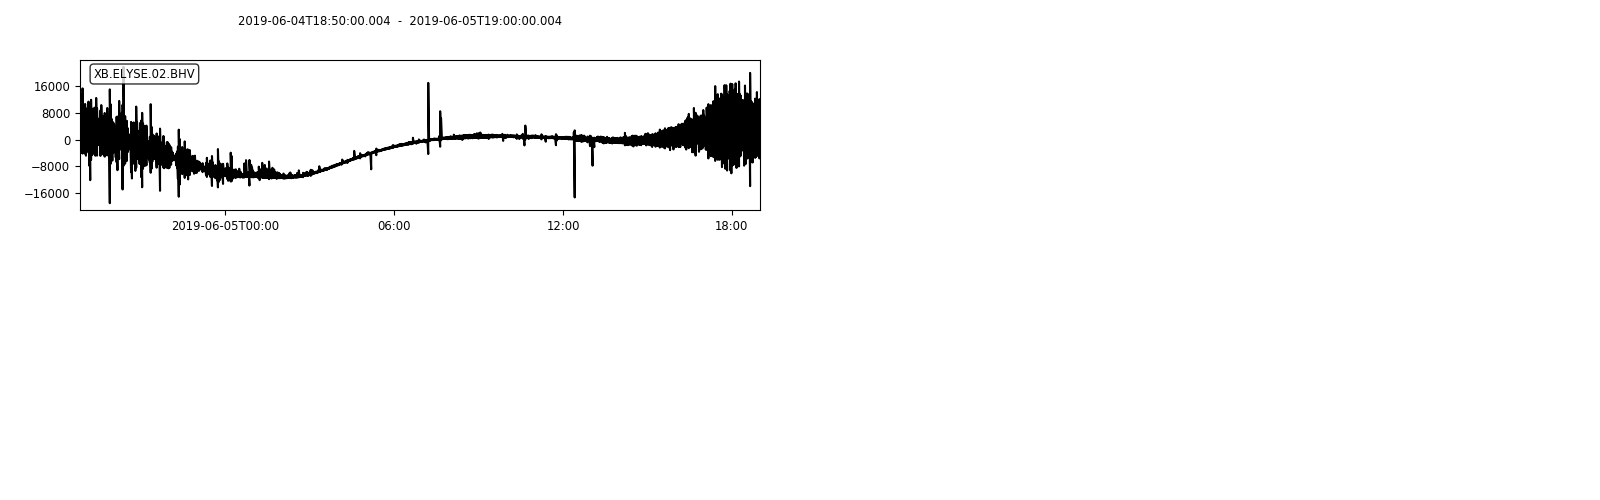

<IPython.core.display.Javascript object>


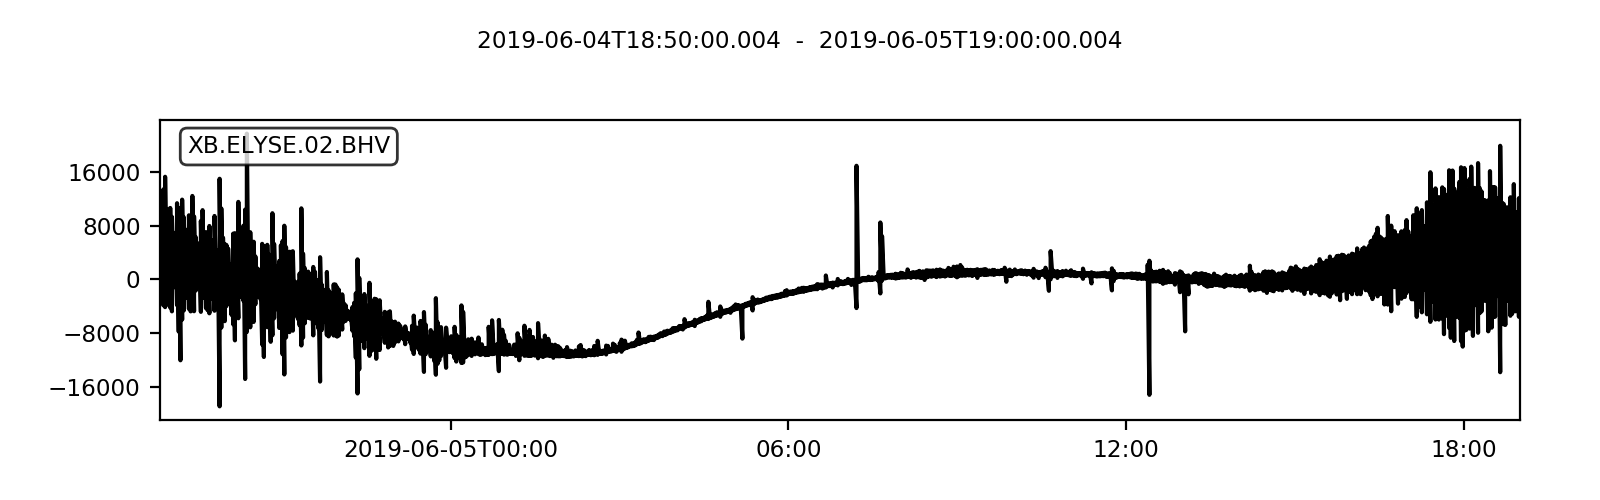

In [21]:
#will change the t and st(stream) based on which plot to import
t = UTCDateTime("2019-06-04T19:00:00")
st = client.get_waveforms('XB','ELYSE','02','BHV', t - 10*60, t + 24*60*60)   #net,sta,loc,cha,start(s),end(s)

print(st)
st.plot()

<IPython.core.display.Javascript object>


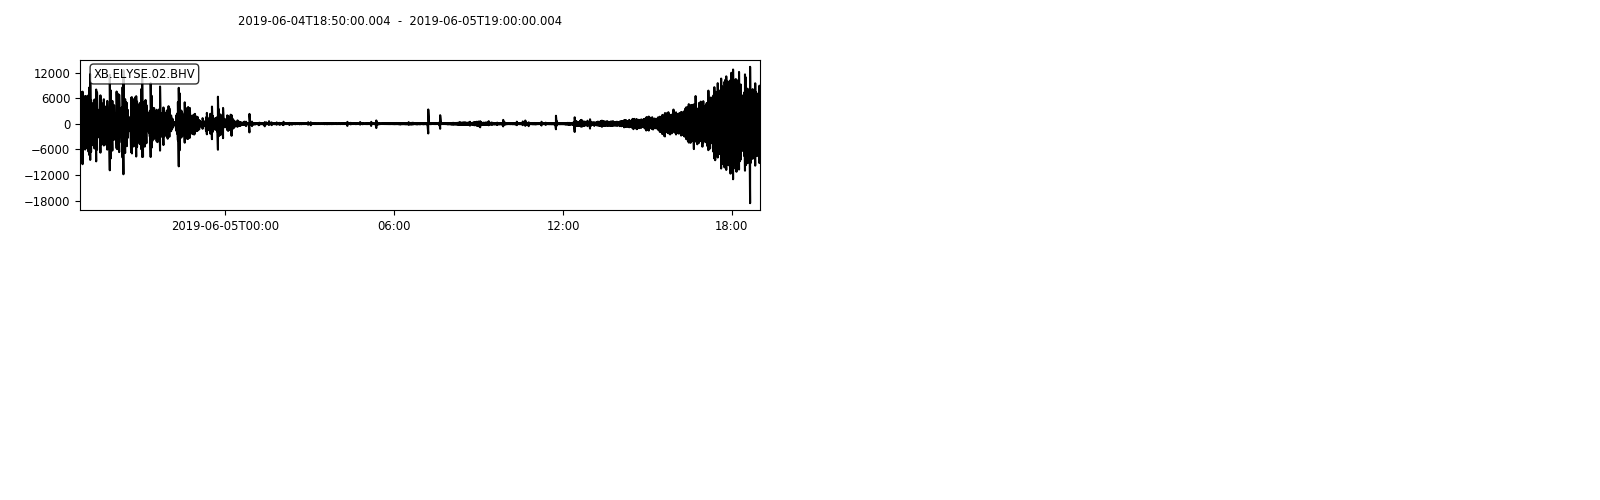

<IPython.core.display.Javascript object>


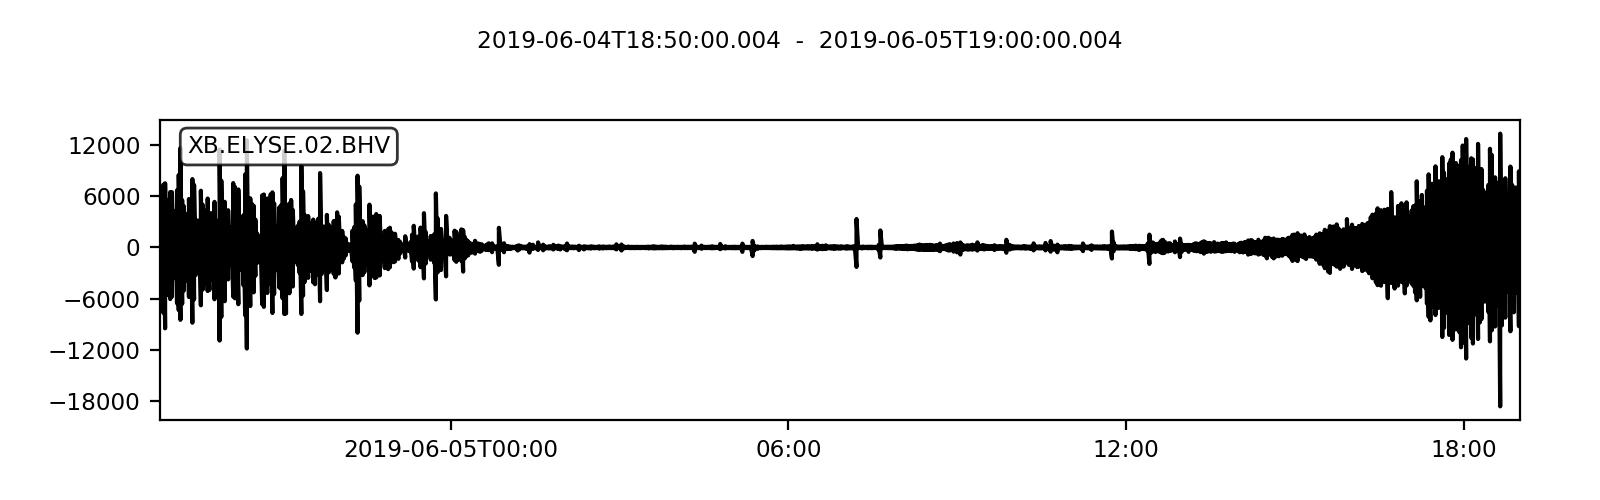

In [22]:
#applies a highpass filter 
st_hp = st.filter('highpass', freq=2.4)
st_hp.plot()

<IPython.core.display.Javascript object>


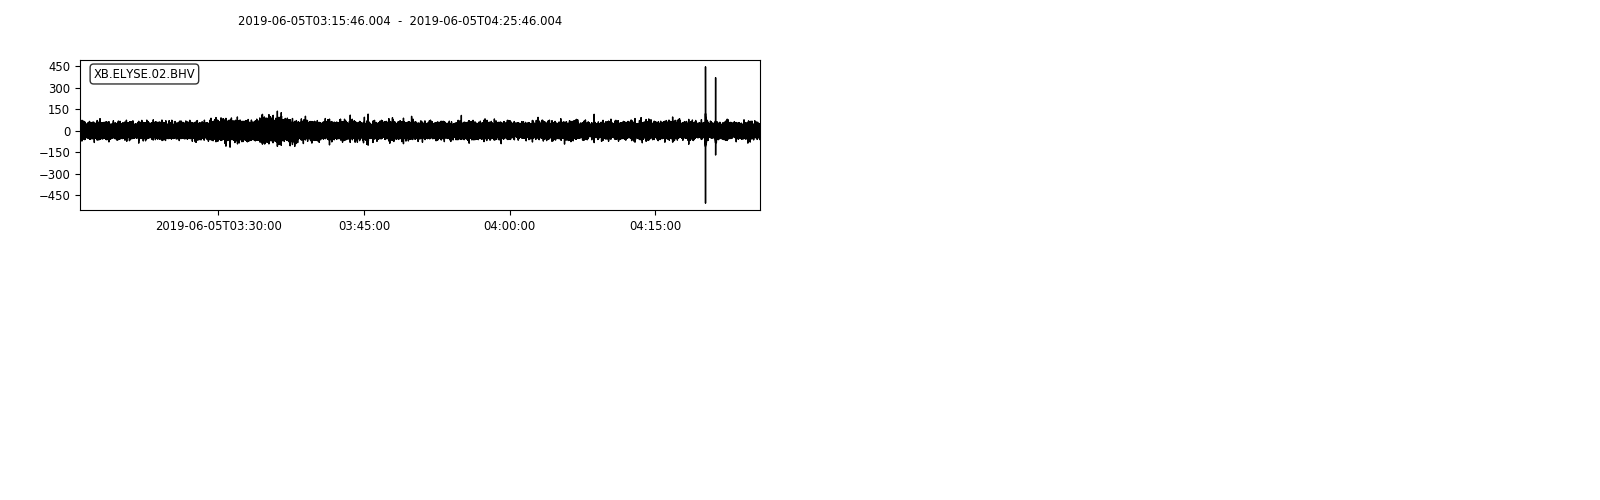

<IPython.core.display.Javascript object>


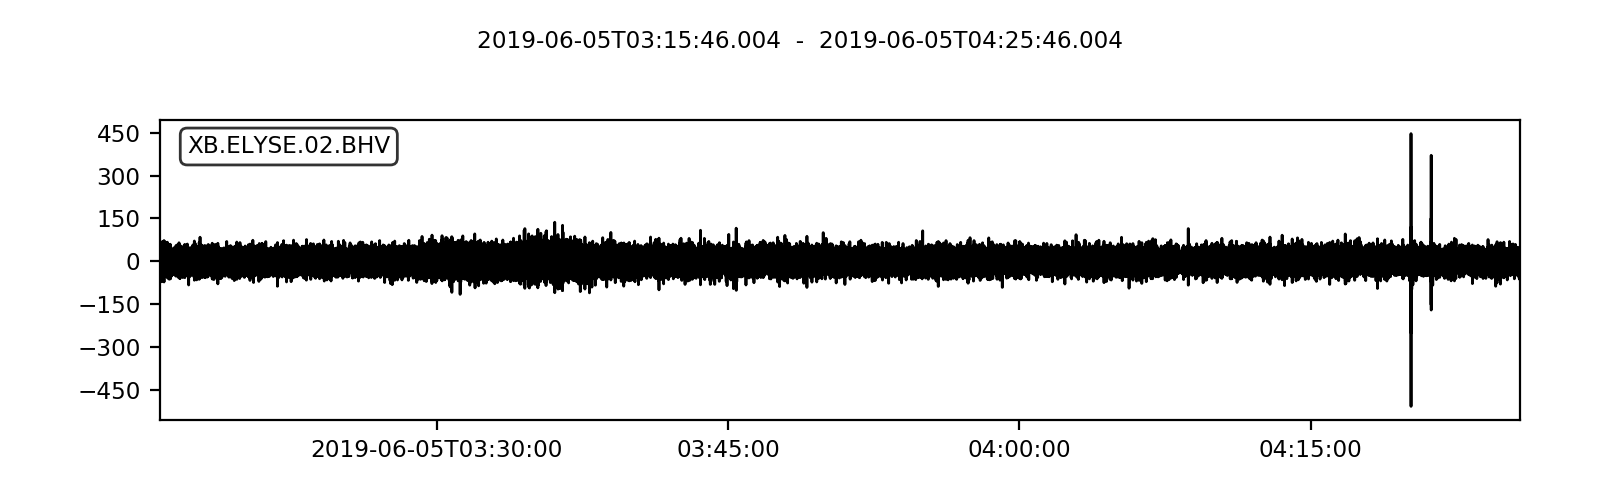

In [23]:
#trim to event times (high freq. event, S0185b @ T03:29:15)
first_arrival = UTCDateTime("2019-06-05T03:25:46")

st_trim = st.trim(first_arrival - 10*60, first_arrival + 60*60)
st_trim.plot()

In [24]:
#investigating traces in mars data stream / there is only 1 trace
tr = st[0]
print(tr)
print(tr.stats)

XB.ELYSE.02.BHV | 2019-06-05T03:15:46.004000Z - 2019-06-05T04:25:46.004000Z | 20.0 Hz, 84001 samples
               network: XB
               station: ELYSE
              location: 02
               channel: BHV
             starttime: 2019-06-05T03:15:46.004000Z
               endtime: 2019-06-05T04:25:46.004000Z
         sampling_rate: 20.0
                 delta: 0.05
                  npts: 84001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 5728, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 2932736})
            processing: ['ObsPy 1.2.1: trim(endtime=UTCDateTime(2019, 6, 5, 19, 0, 0, 4000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 6, 4, 18, 50, 0, 4000))', "ObsPy 1.2.1: filter(options={'freq': 2.4}::type='highpass')", 'ObsPy 1.2.1: trim(endtime=UTCDateTim

<IPython.core.display.Javascript object>


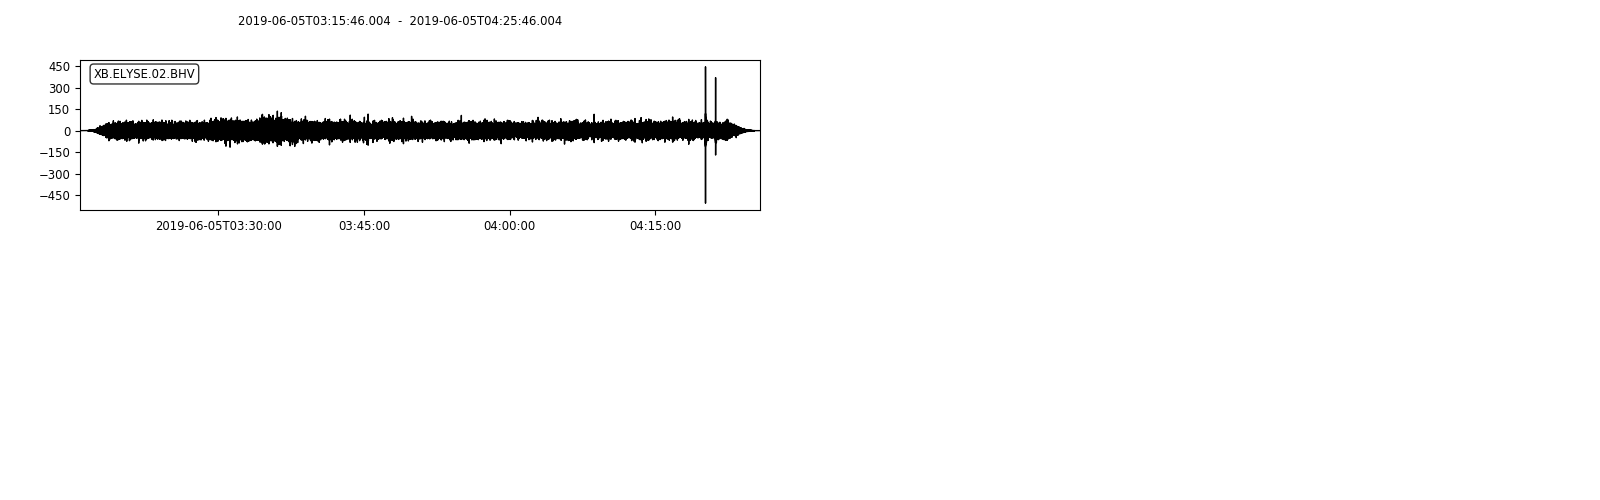

<IPython.core.display.Javascript object>


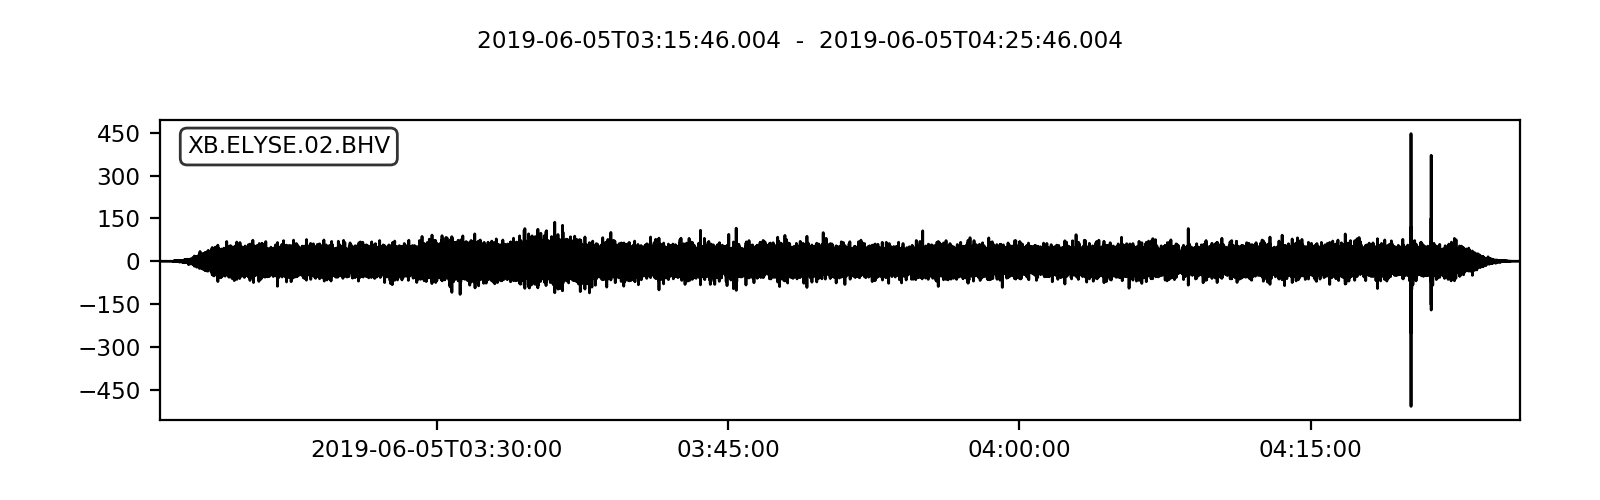

In [26]:
#possible ways to smooth data
st.detrend("linear")  #removes a trend from the data (ex. linear will make a linear trend between first and last and subtract it)
st.taper(max_percentage=0.05, type='cosine')
st.plot()

In [8]:
#trying to pull data from the paper suggested SEIS request service (similar to the query search)
#the fdsnws catalog (possibly an example from the tutorial?)

from obspy import read
st = read("S0185_fdsnws.mseed", format="mseed")
print(st)

#pulling from database only gives BHU, BHV, BHW channels (the paper reports using the vertical component - BHZ)

3 Trace(s) in Stream:
XB.ELYSE.02.BHU | 2019-06-04T18:59:54.902000Z - 2019-06-05T20:00:04.452000Z | 20.0 Hz, 1800192 samples
XB.ELYSE.02.BHV | 2019-06-04T18:59:50.851000Z - 2019-06-05T20:00:07.001000Z | 20.0 Hz, 1800324 samples
XB.ELYSE.02.BHW | 2019-06-04T18:59:51.752000Z - 2019-06-05T20:00:02.152000Z | 20.0 Hz, 1800209 samples


<IPython.core.display.Javascript object>


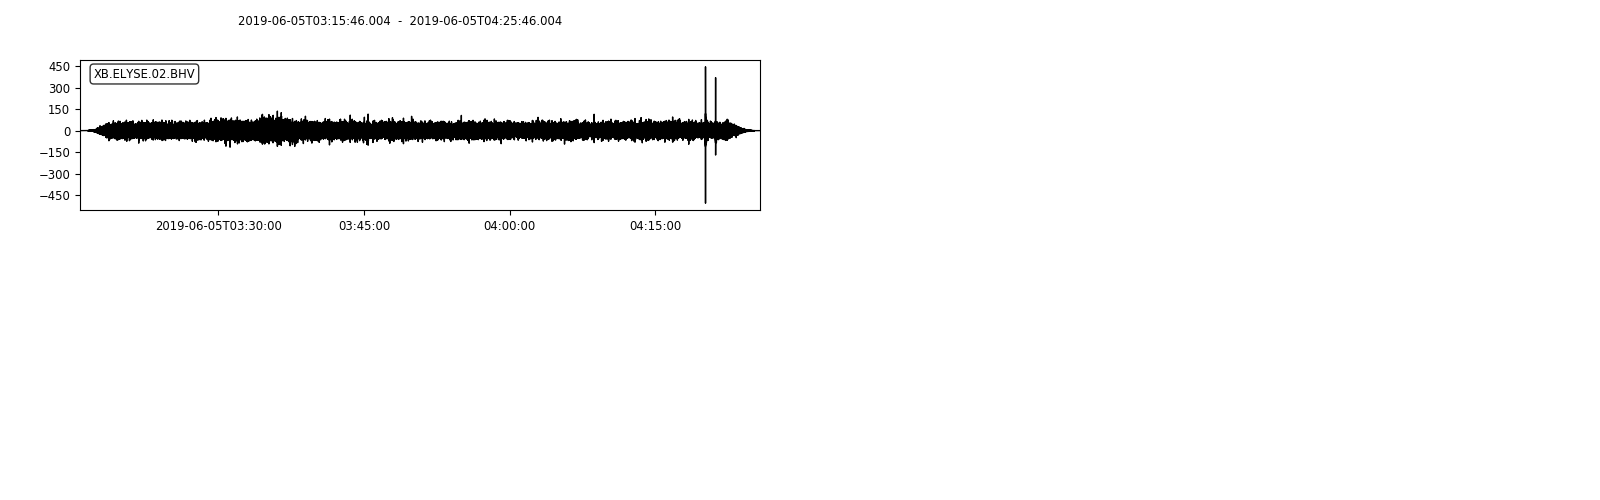

<IPython.core.display.Javascript object>


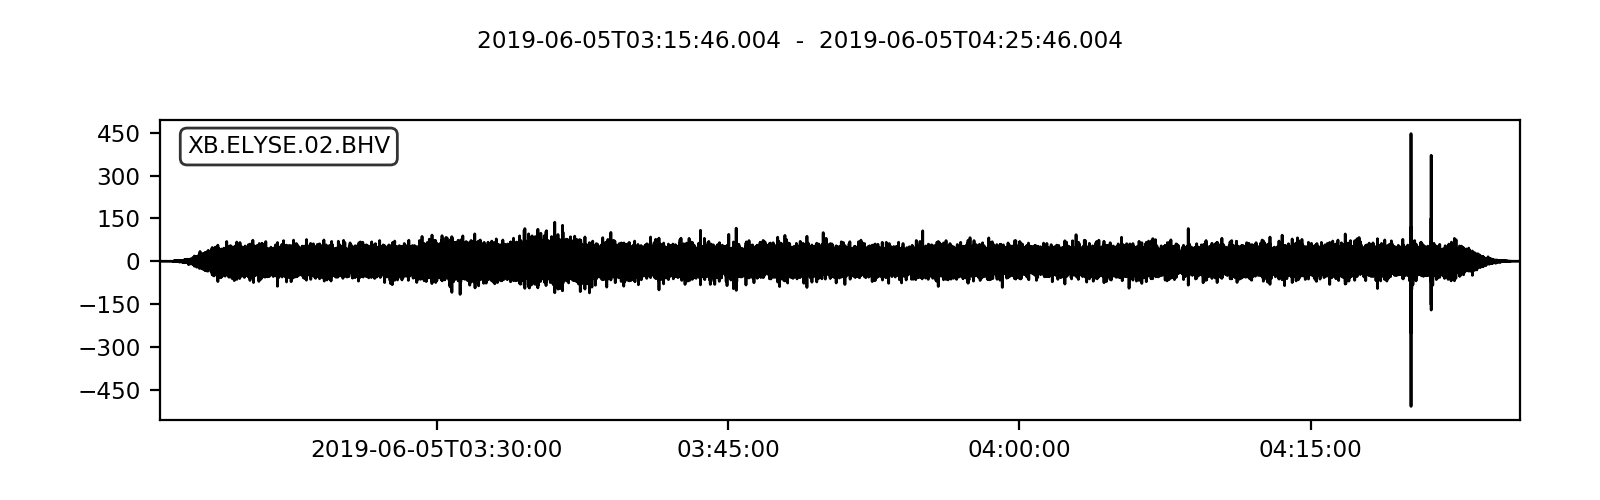

In [27]:
st.plot()

# S0189

3 Trace(s) in Stream:
XB.ELYSE.02.BHU | 2019-06-08T23:59:55.160000Z - 2019-06-09T08:00:03.160000Z | 20.0 Hz, 576161 samples
XB.ELYSE.02.BHV | 2019-06-08T23:59:48.910000Z - 2019-06-09T08:00:10.560000Z | 20.0 Hz, 576434 samples
XB.ELYSE.02.BHW | 2019-06-08T23:59:53.660000Z - 2019-06-09T08:00:08.510000Z | 20.0 Hz, 576298 samples


<IPython.core.display.Javascript object>


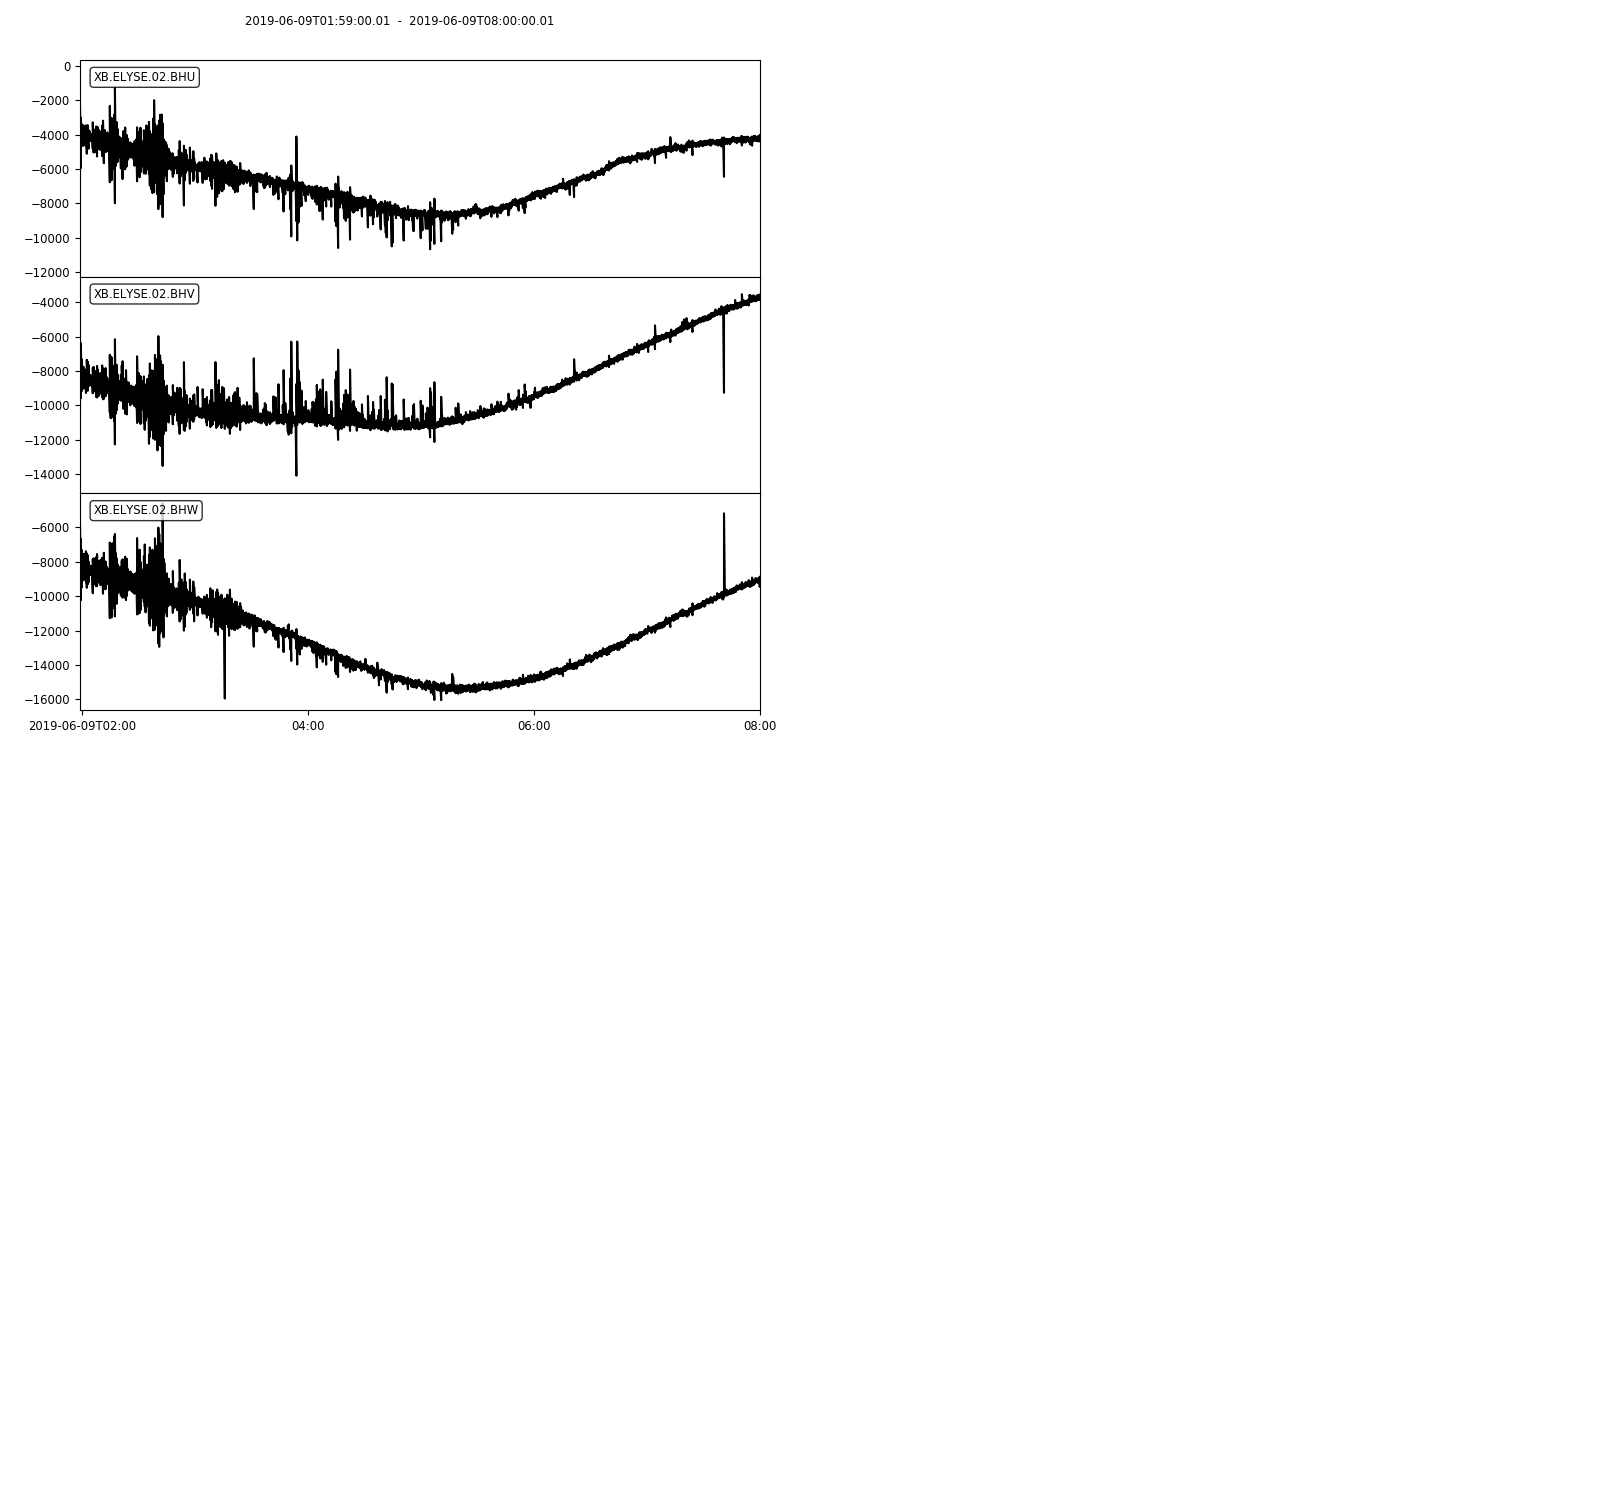

<IPython.core.display.Javascript object>


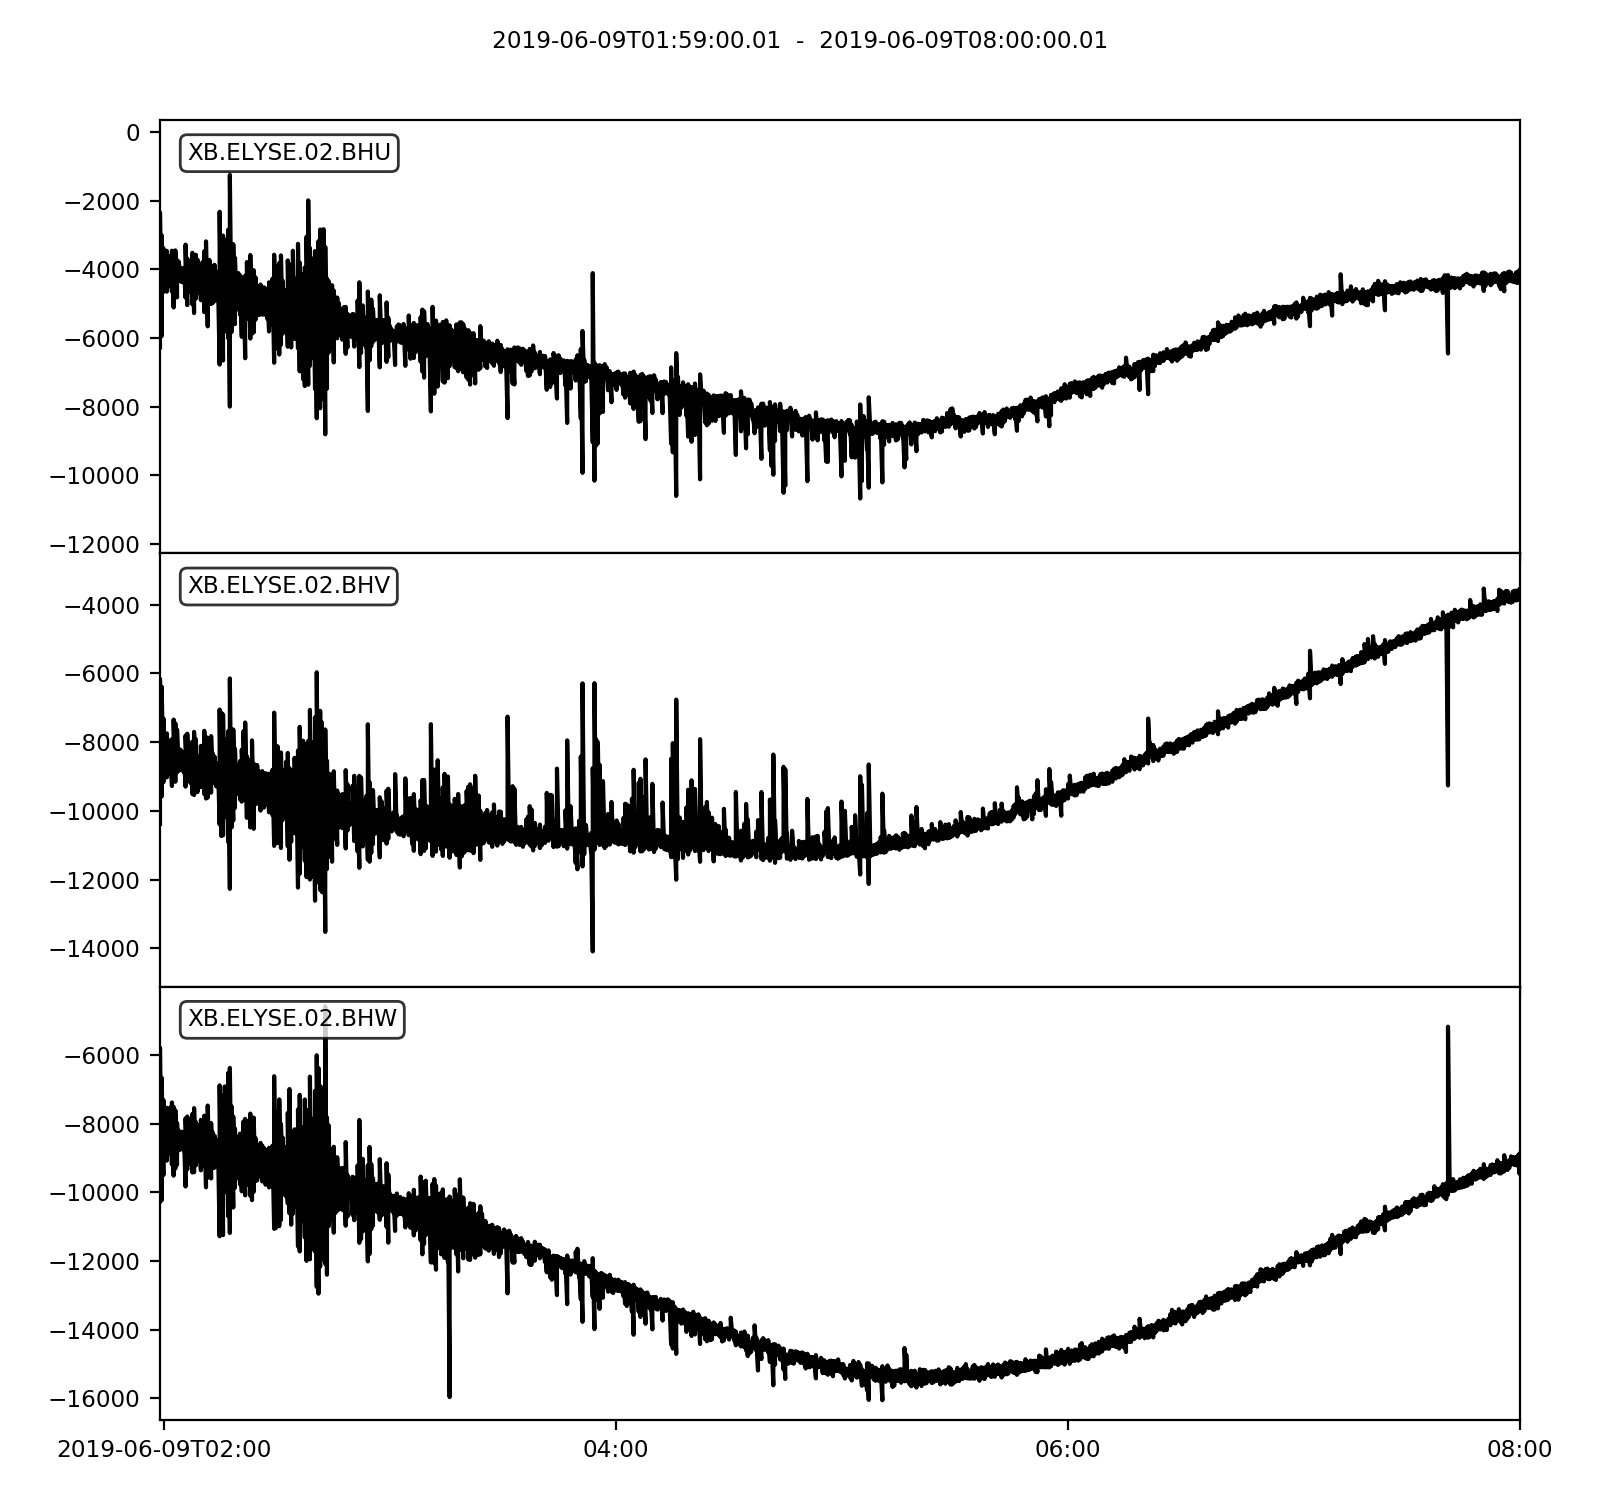

In [34]:
from obspy import read
st189 = read("S0189_fdsnws.mseed", format="mseed")
print(st189)

t = UTCDateTime('2019-06-08T23:59:00')
t2 = UTCDateTime('2019-06-09T08:00:00')

st189.trim(t + 2*60*60, t2)
st189.plot()

<IPython.core.display.Javascript object>


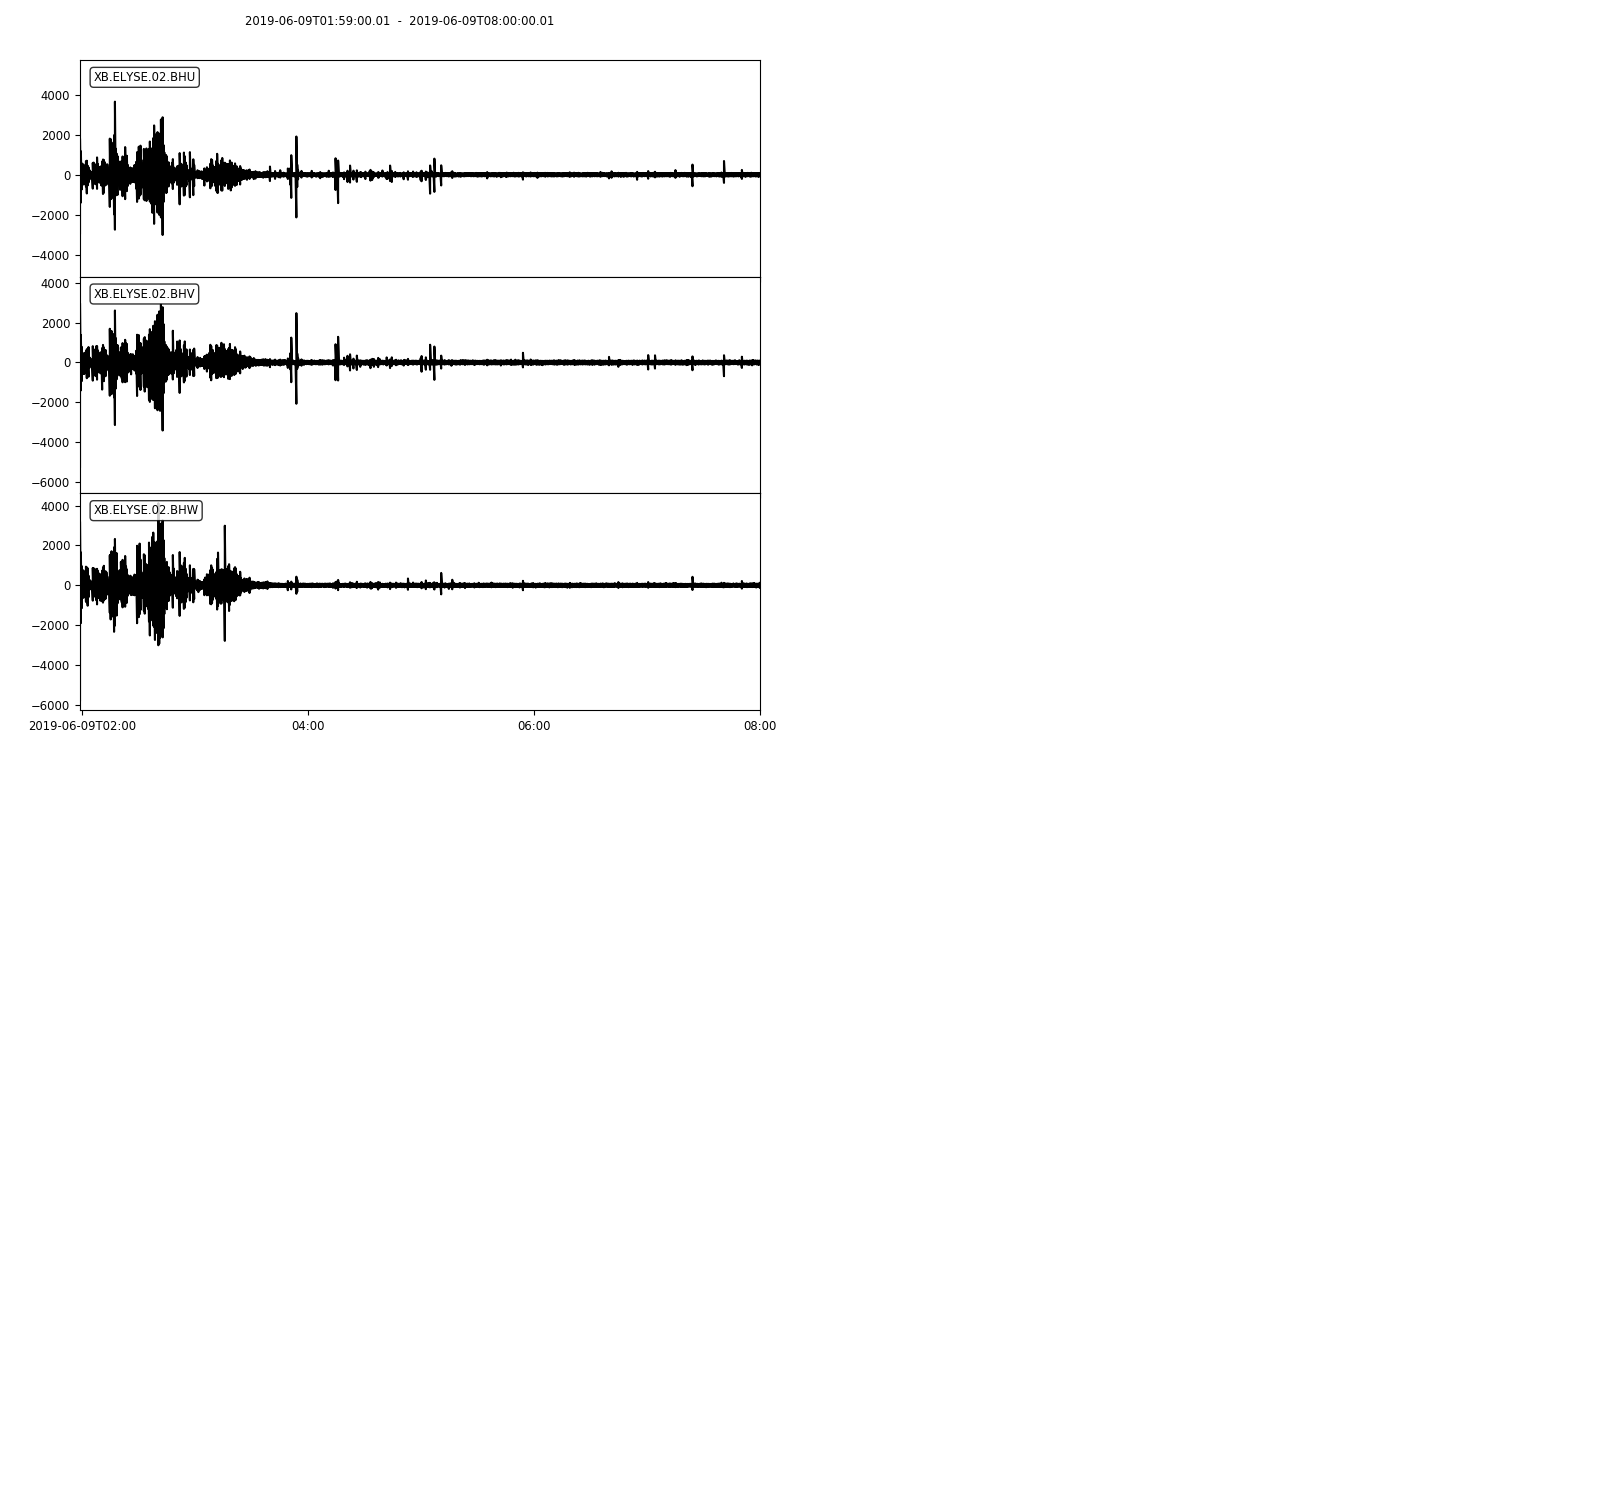

<IPython.core.display.Javascript object>


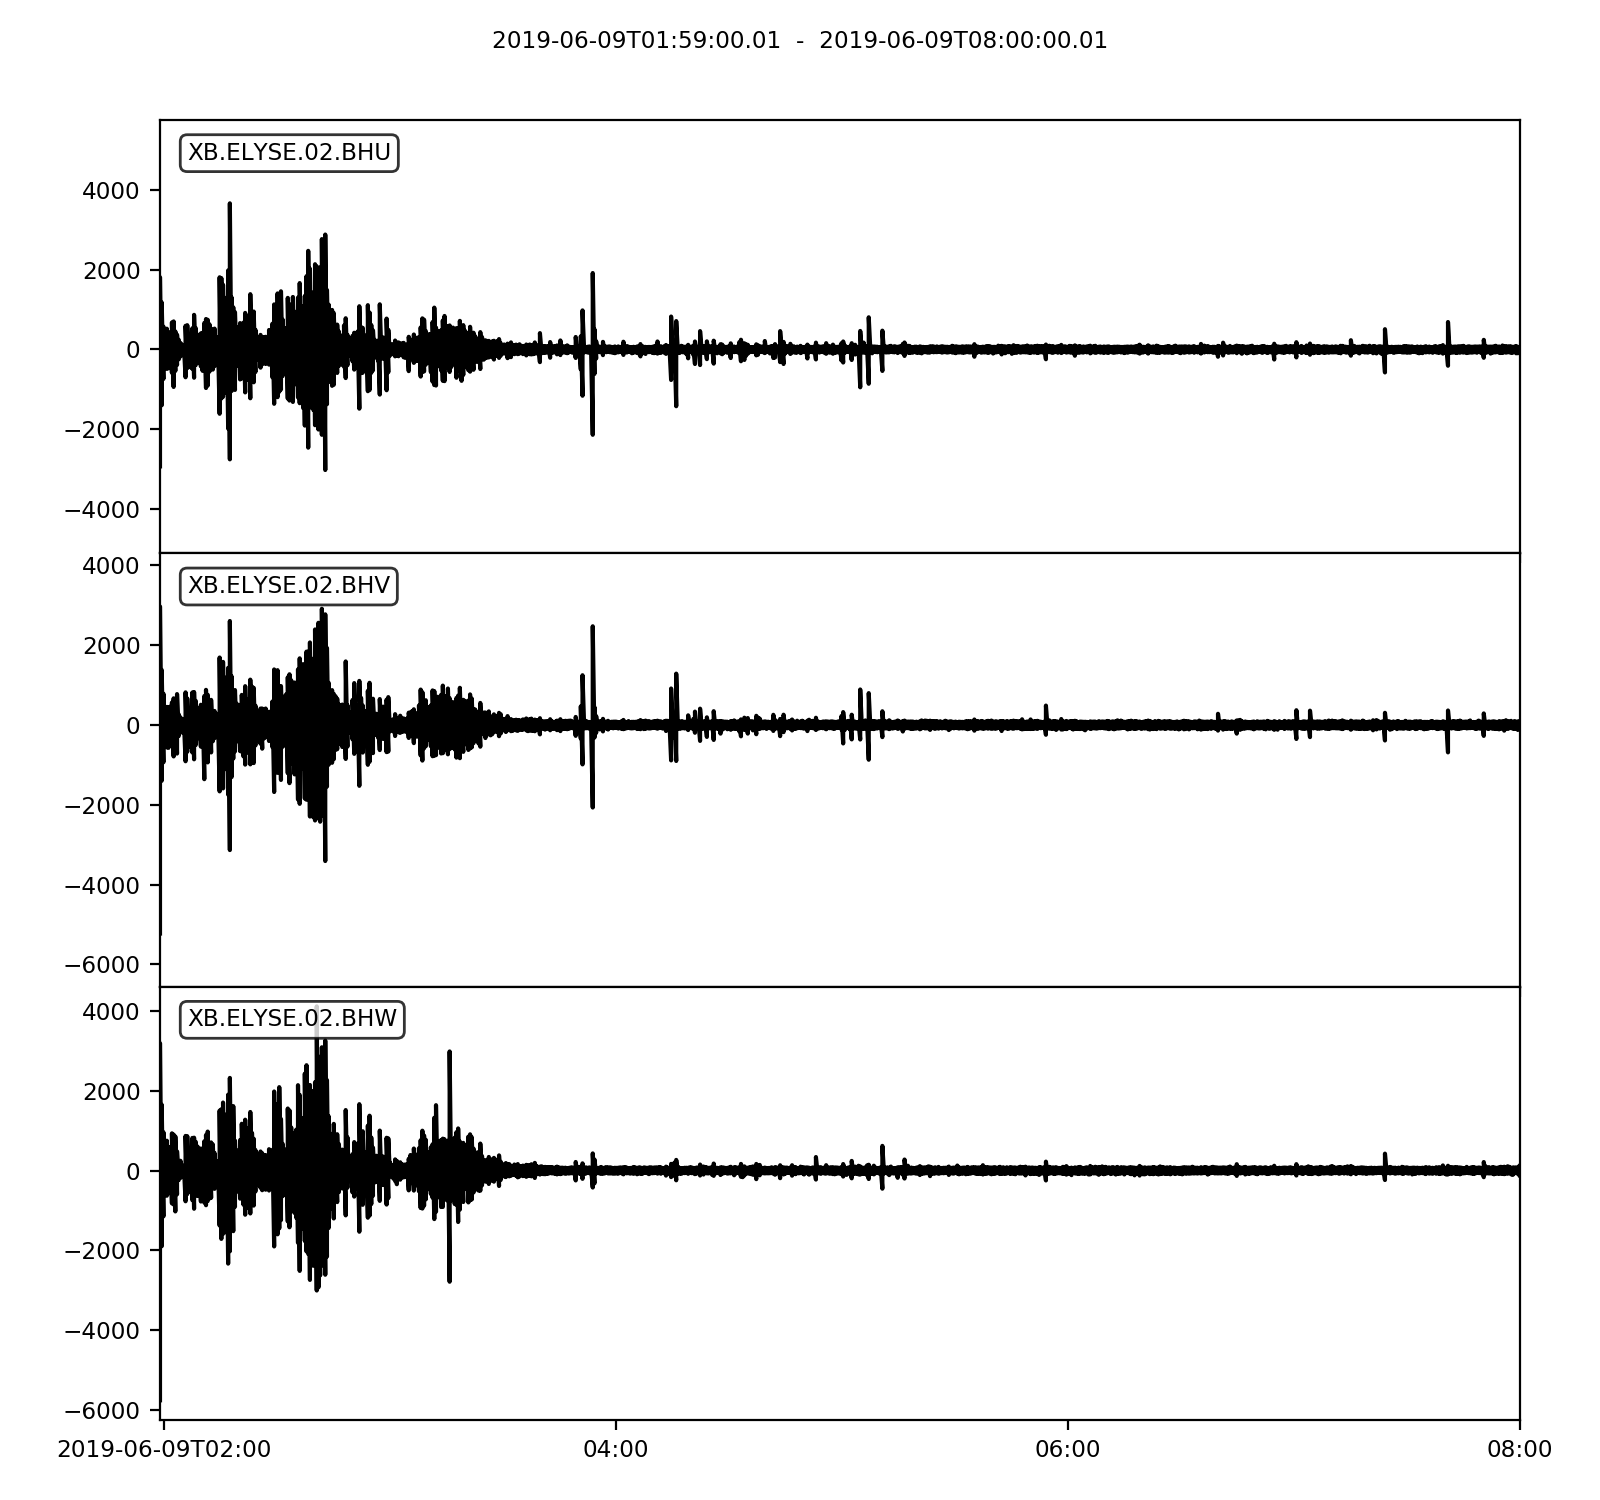

In [35]:
#BHW plot seems to match the most to the high and low pass plots of S0189 in 'Siesmicity of Mars'

st189_hp = st189.filter('highpass', freq=1)
st189_hp.plot()

<IPython.core.display.Javascript object>


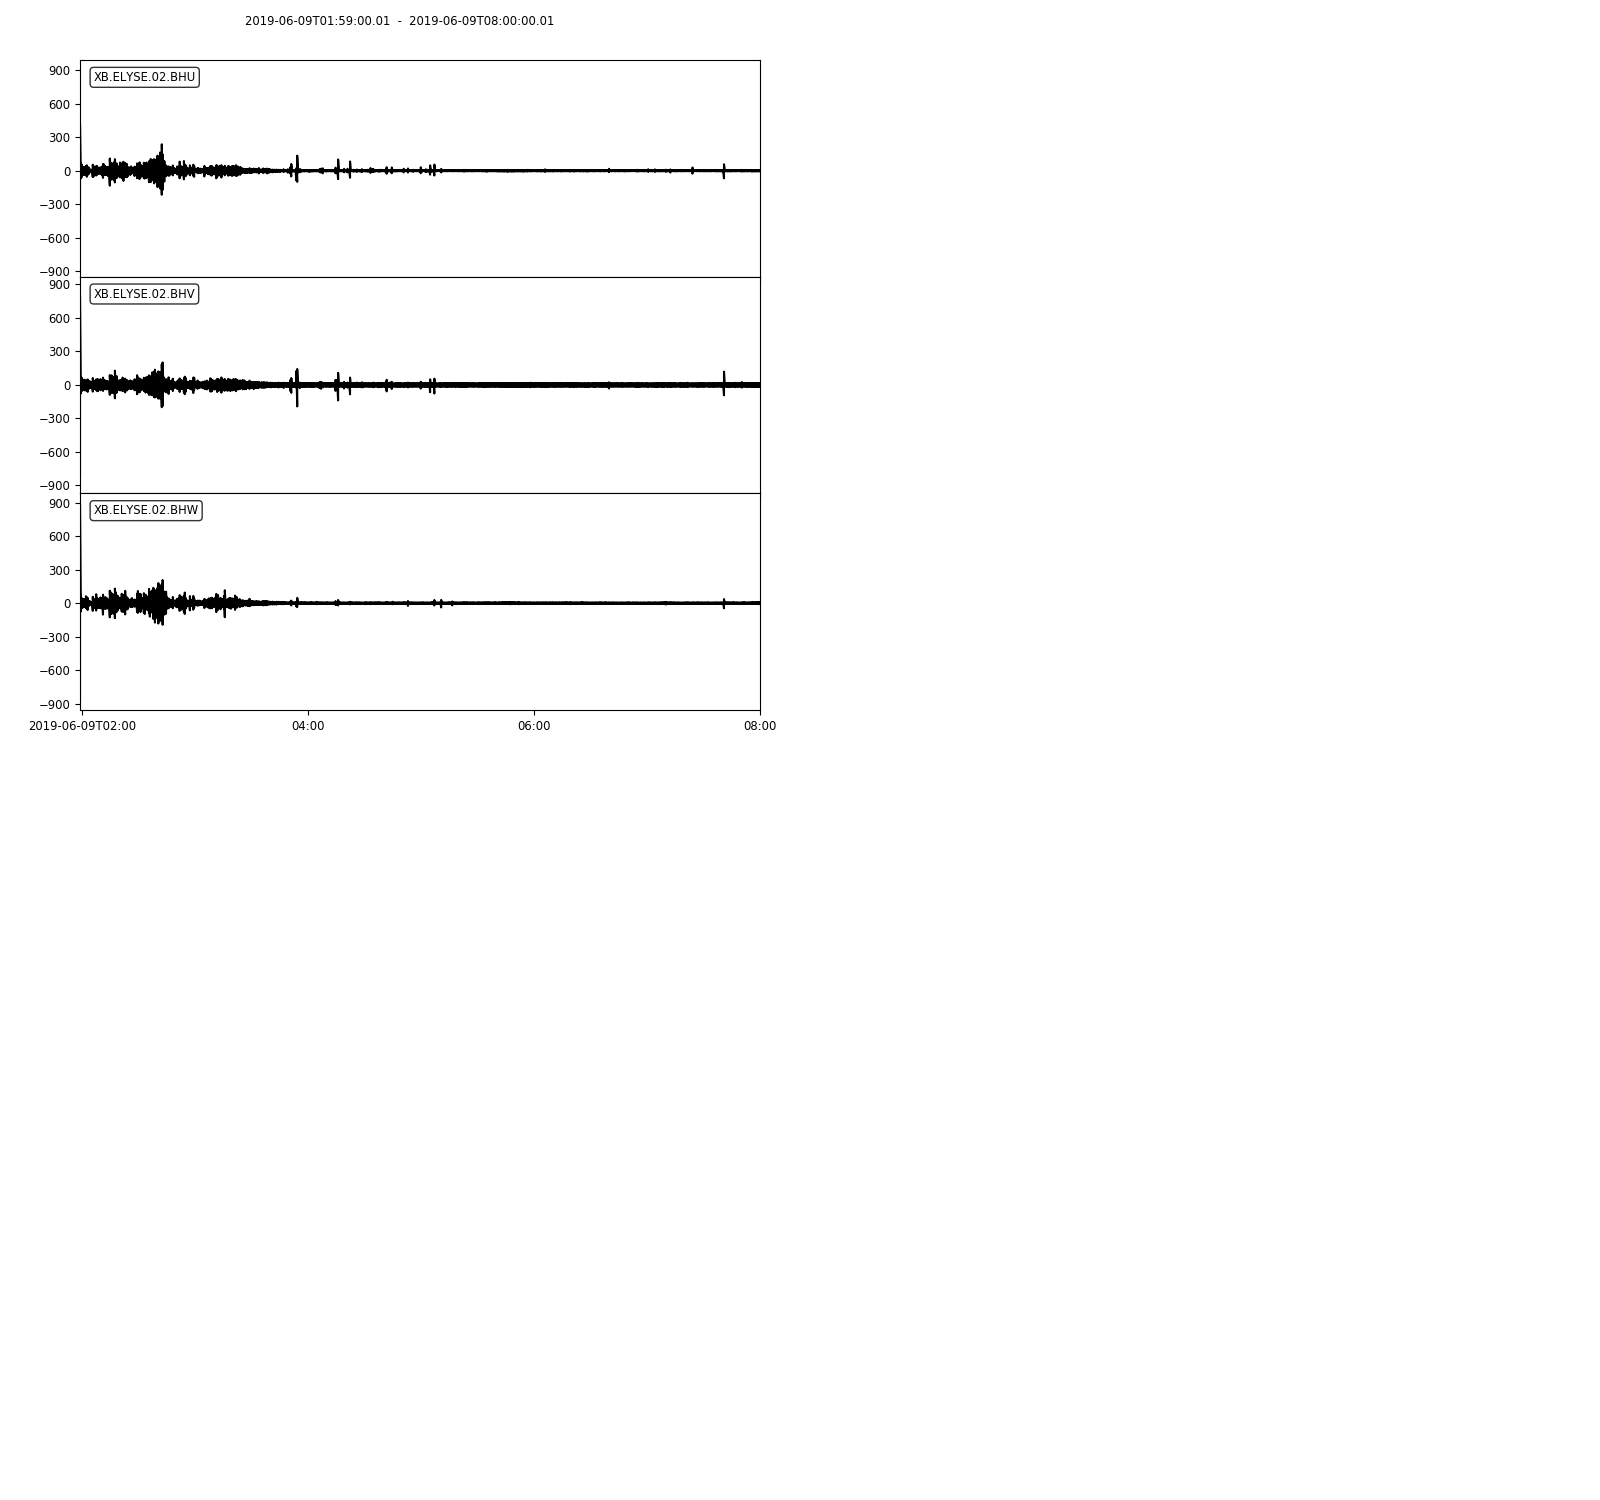

<IPython.core.display.Javascript object>


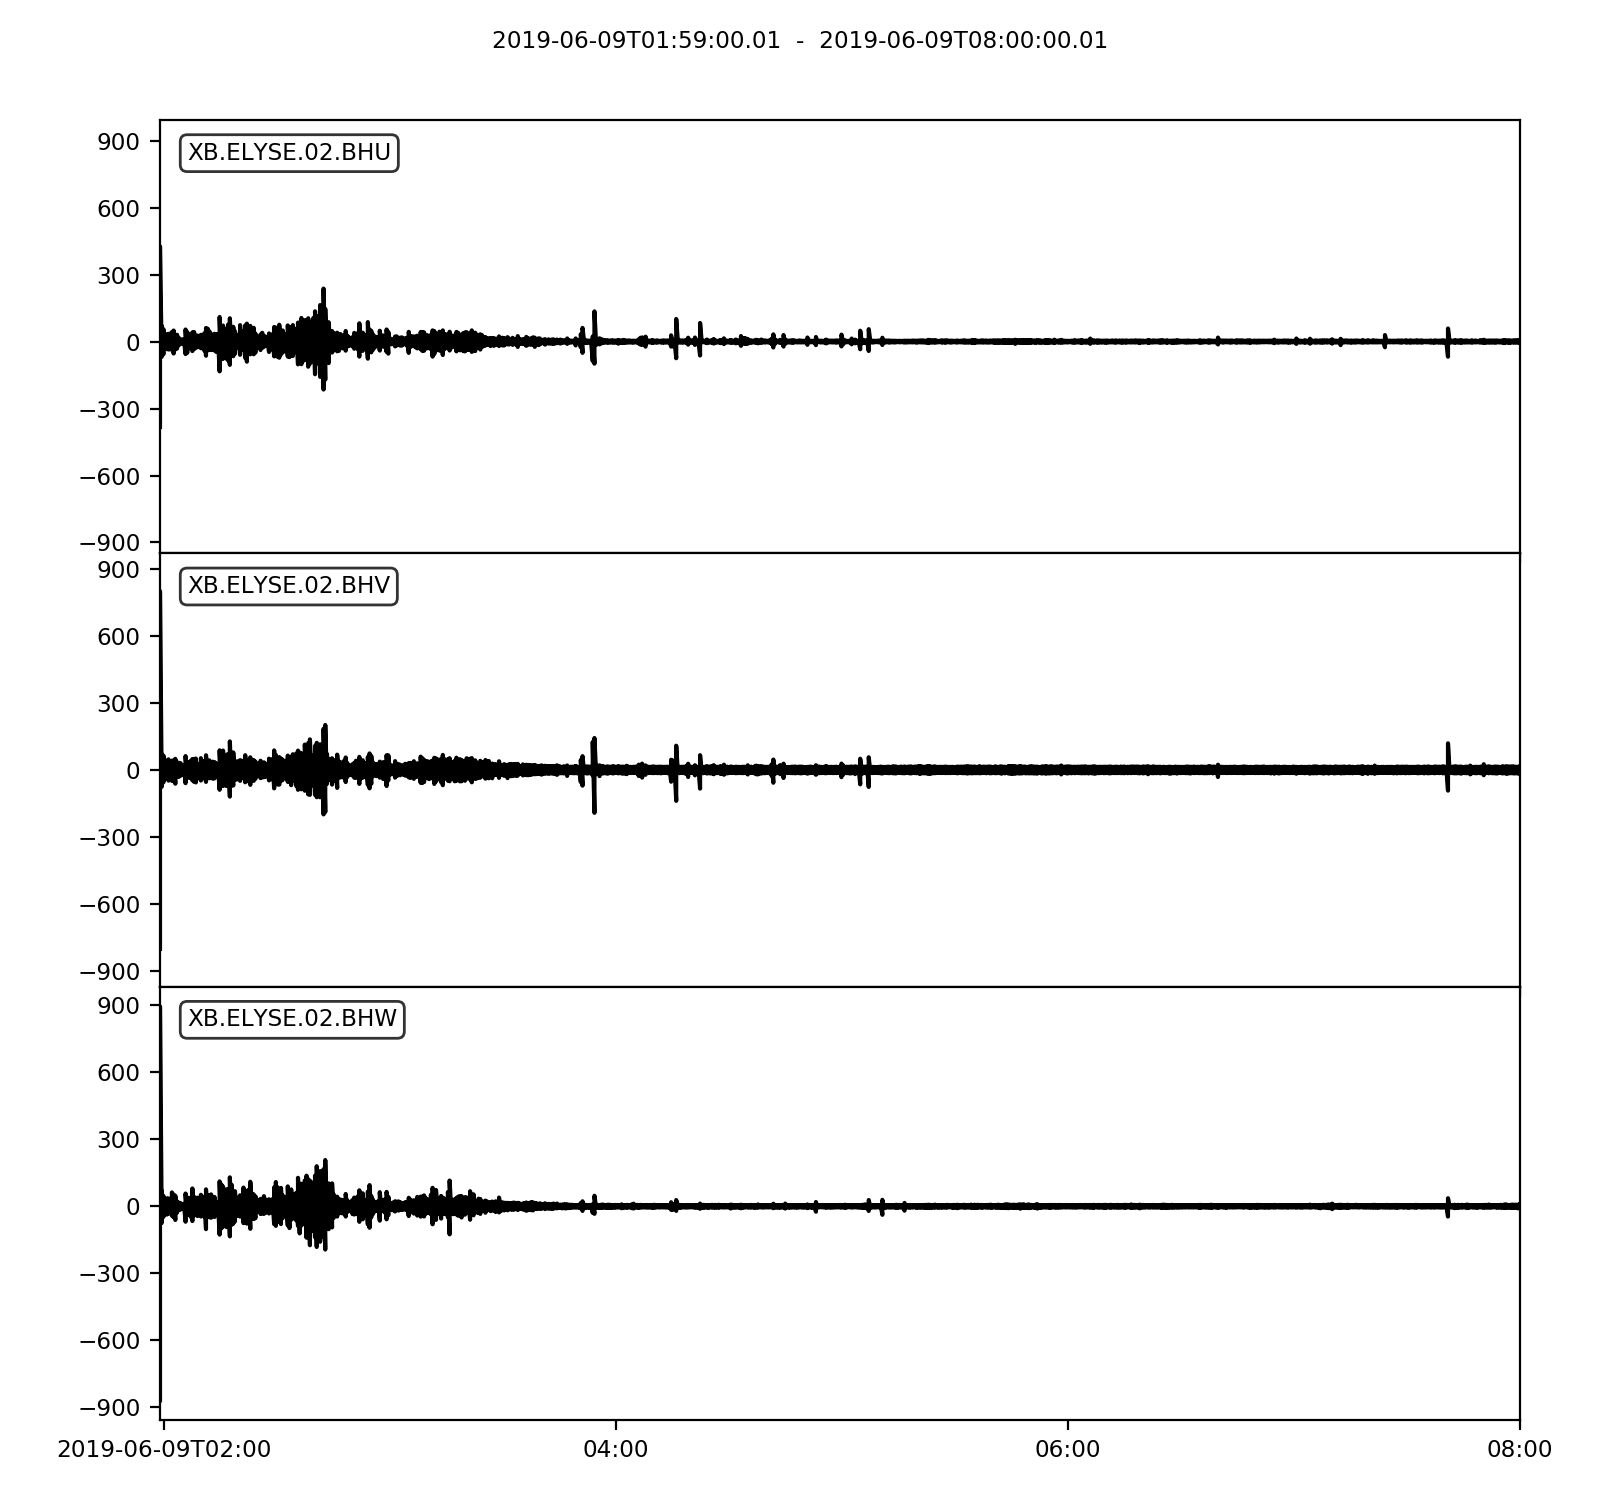

In [36]:
st189_lp = st189.filter('lowpass', freq=1)

st189_lp.plot()

<IPython.core.display.Javascript object>


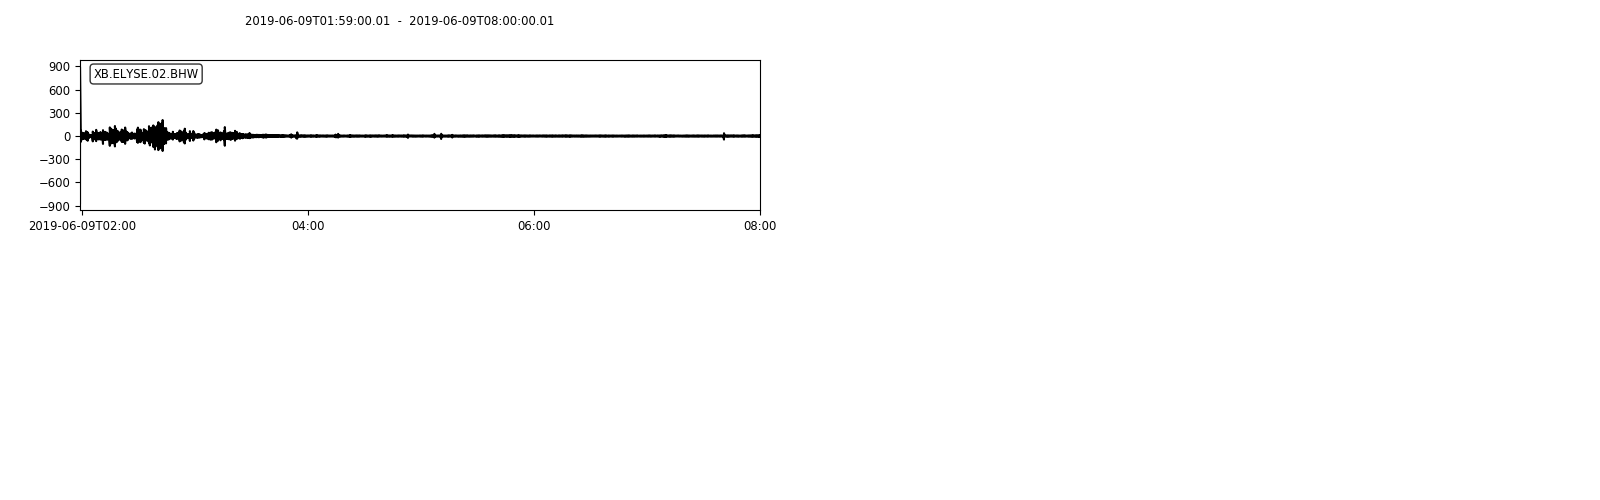

<IPython.core.display.Javascript object>


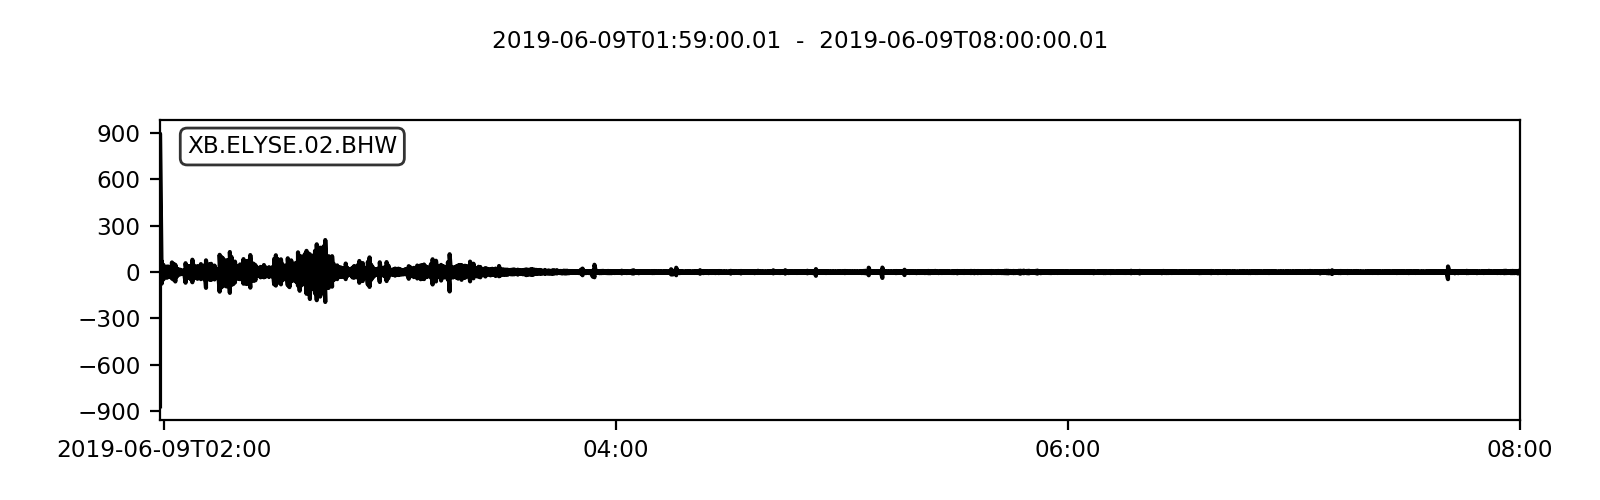

In [37]:
st189[2].plot()

<IPython.core.display.Javascript object>


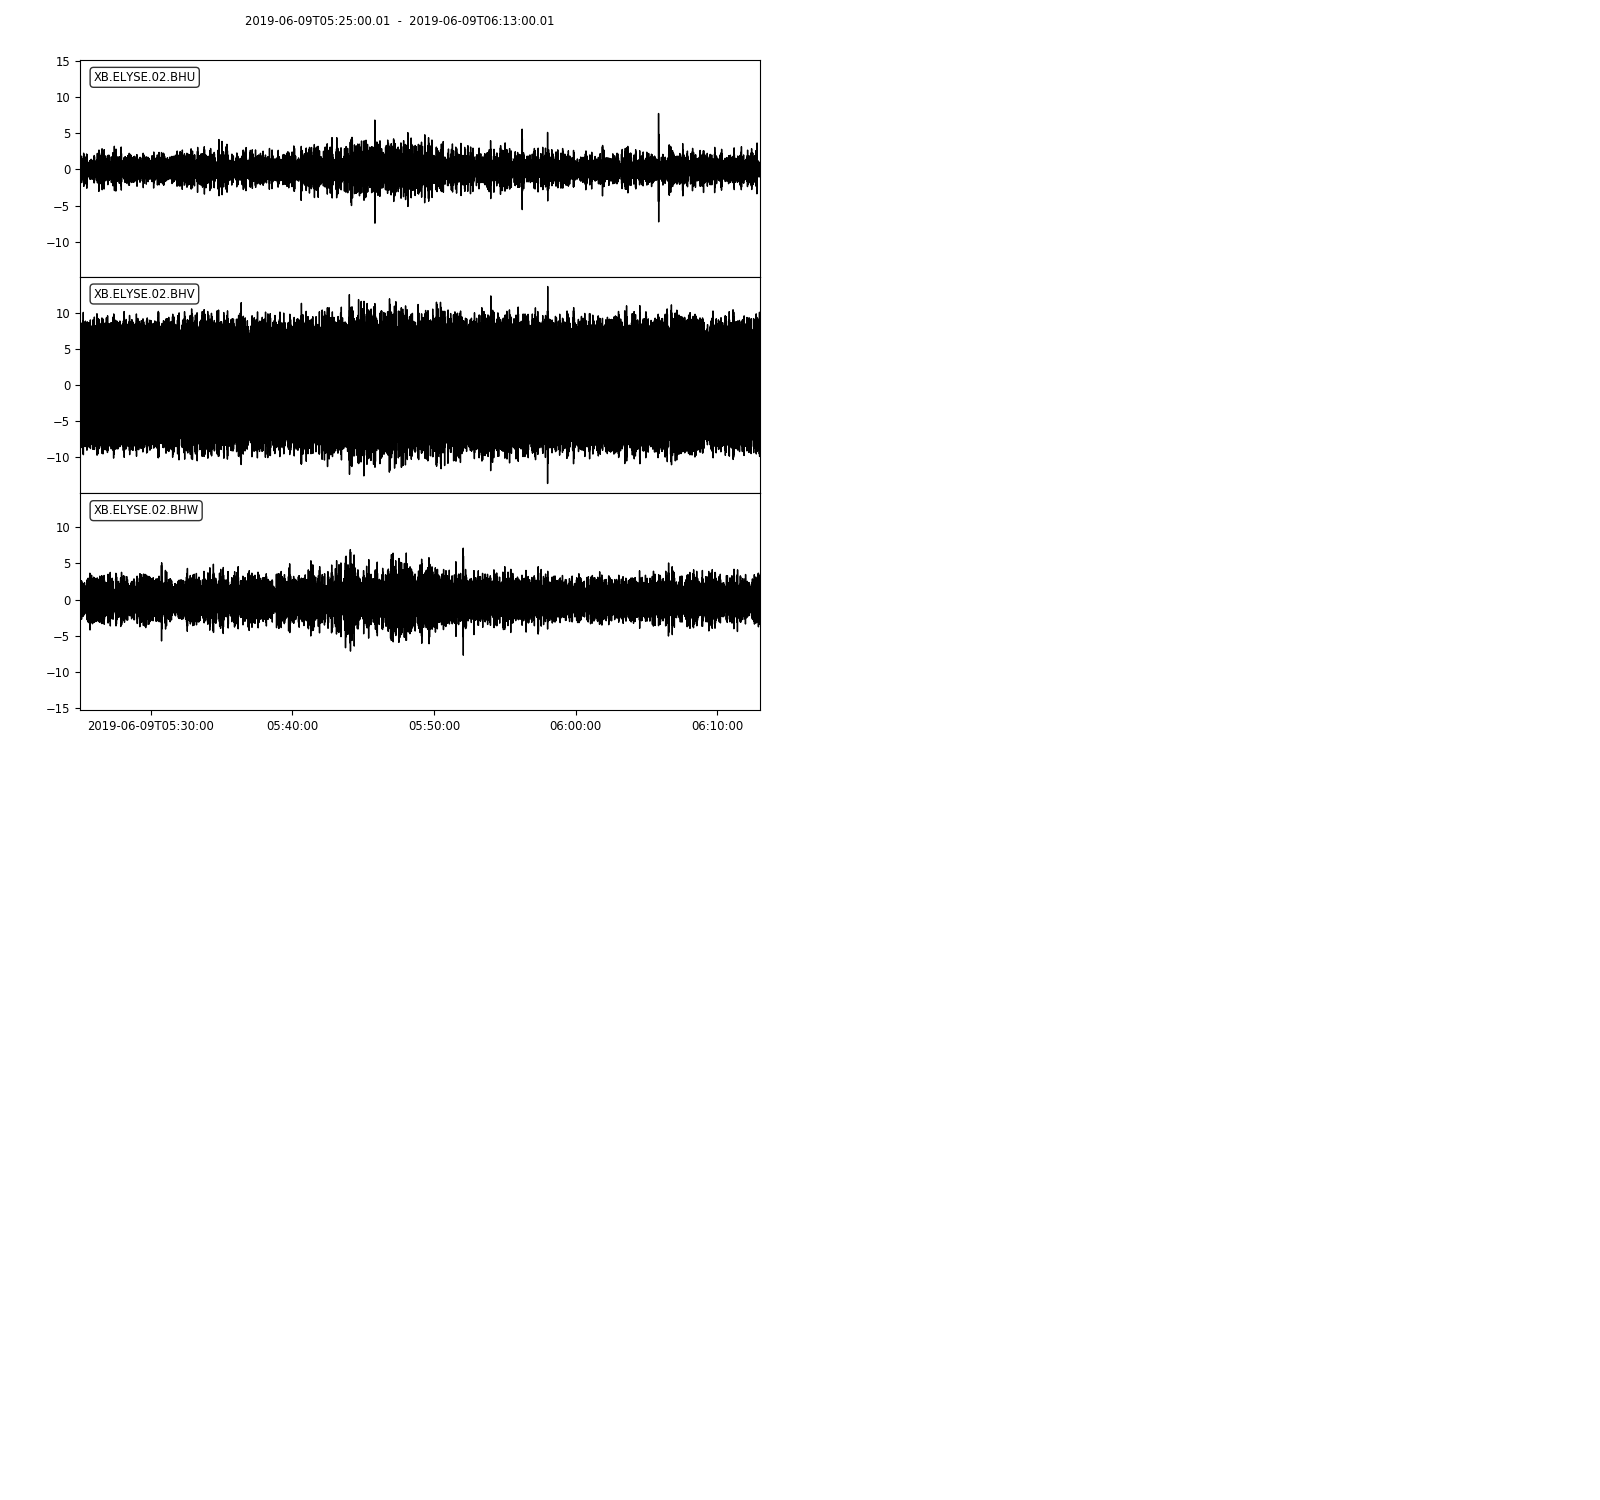

<IPython.core.display.Javascript object>


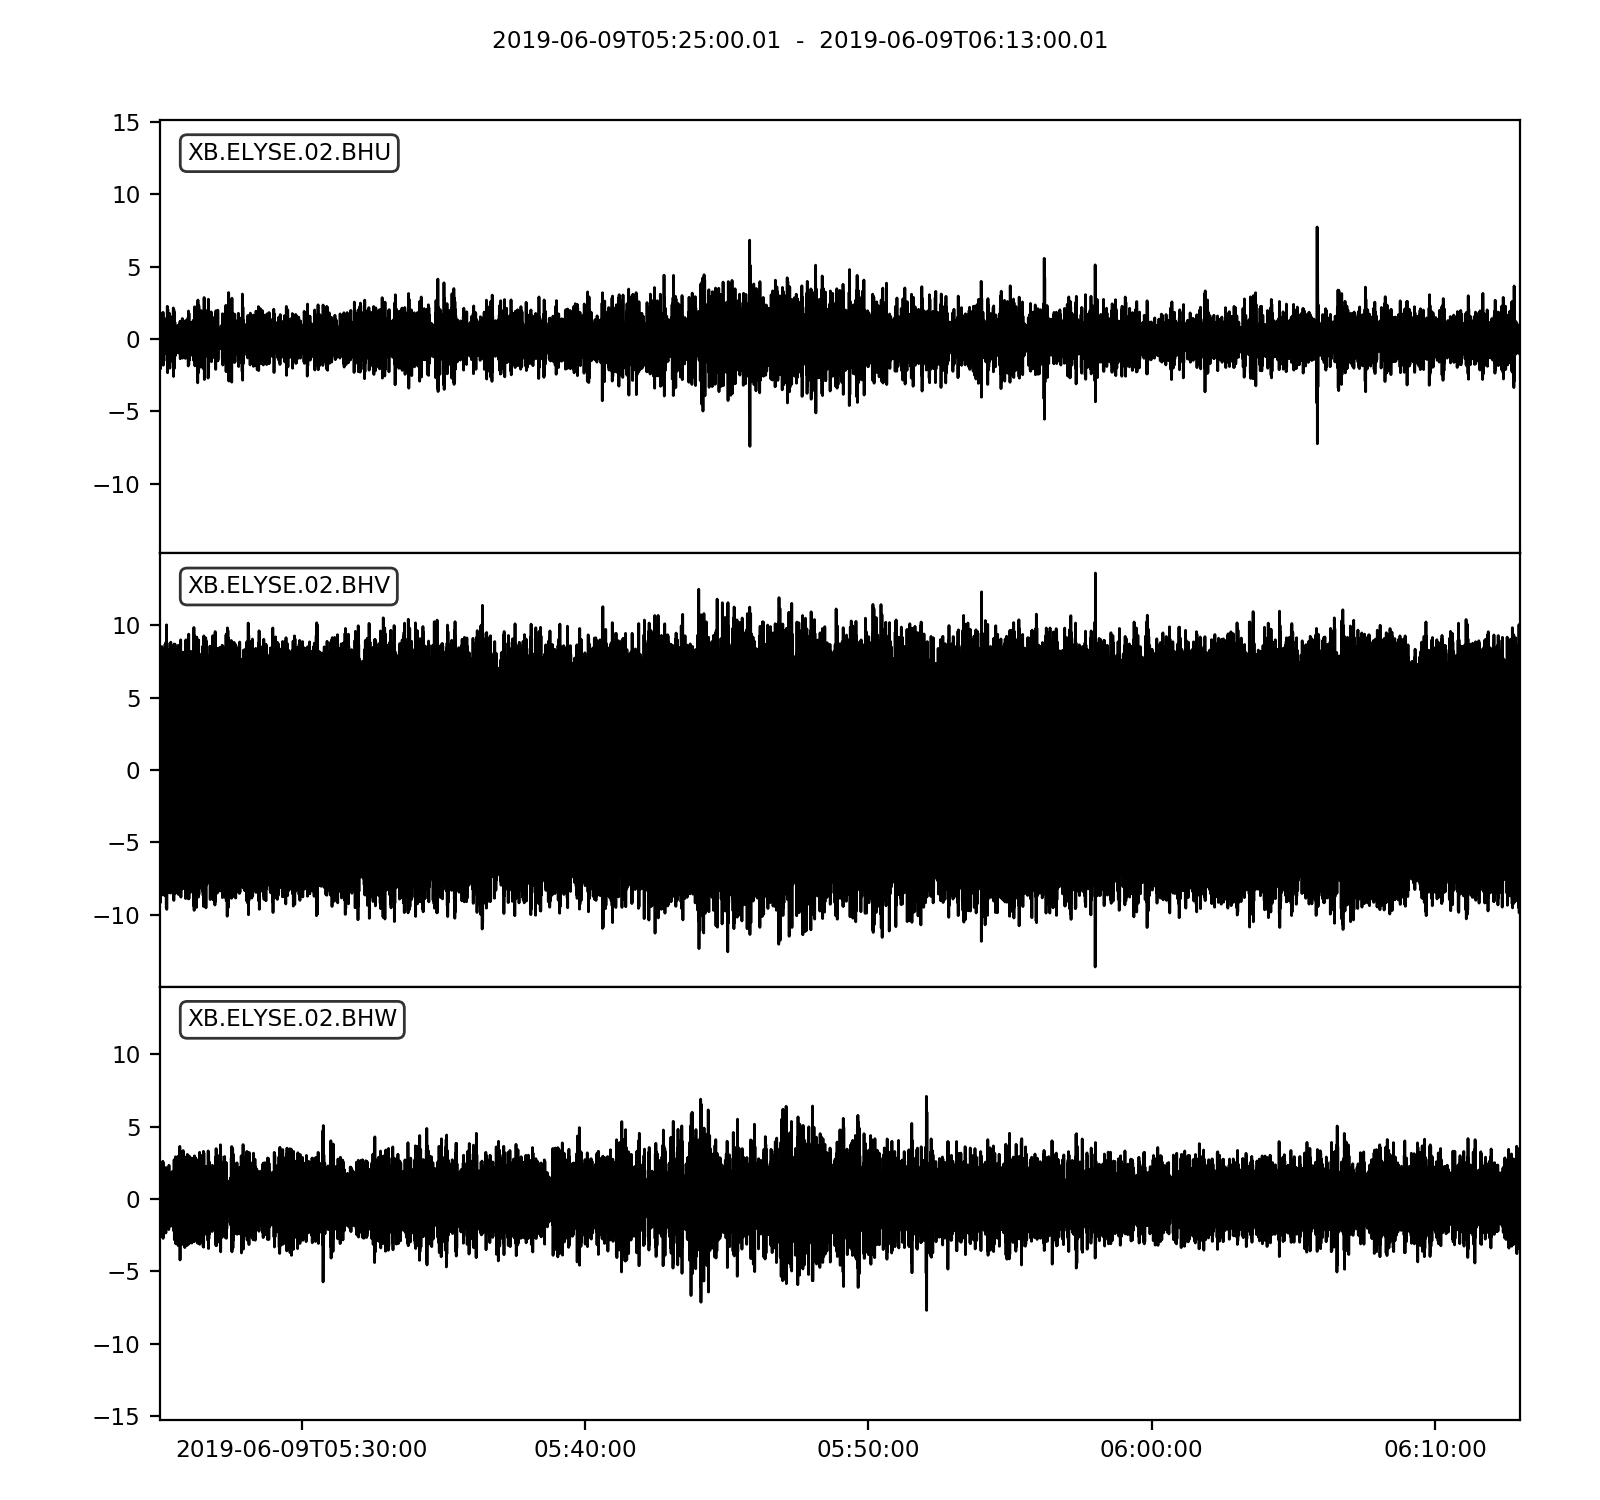

In [33]:
#recreating extended fig 1a (S0189)
new_t = UTCDateTime('2019-06-09T05:25:00')
new_t2 = UTCDateTime('2019-06-09T06:13:00')

st189_trim = st189.trim(new_t, new_t2)
st189_trim.plot()                         #seems to have a lot higher baseline noise level?

# Directly from InSight Database
## Recreating Plot from Fig. 4 (Initial Results)

In [39]:
import obspy
from obspy.clients.fdsn import Client
client = Client("IPGP")

t = UTCDateTime("2019-07-26T04:35:00")
st = client.get_waveform("XB","ELYSE", "02", "*", t, t + 24*60*60)
st.plot()

FDSNException: No FDSN services could be discovered at 'http://ws.ipgp.fr'. This could be due to a temporary service outage or an invalid FDSN service address.

# Initial Results Recreation
## S0235b and S0105a

In [40]:
#corrected for instrument response (not possible for marsquakes?)
# & filtered between 0.125 and 0.5Hz

from obspy.clients.fdsn import Client
from obspy import UTCDateTime
client = Client("IRIS")

<IPython.core.display.Javascript object>


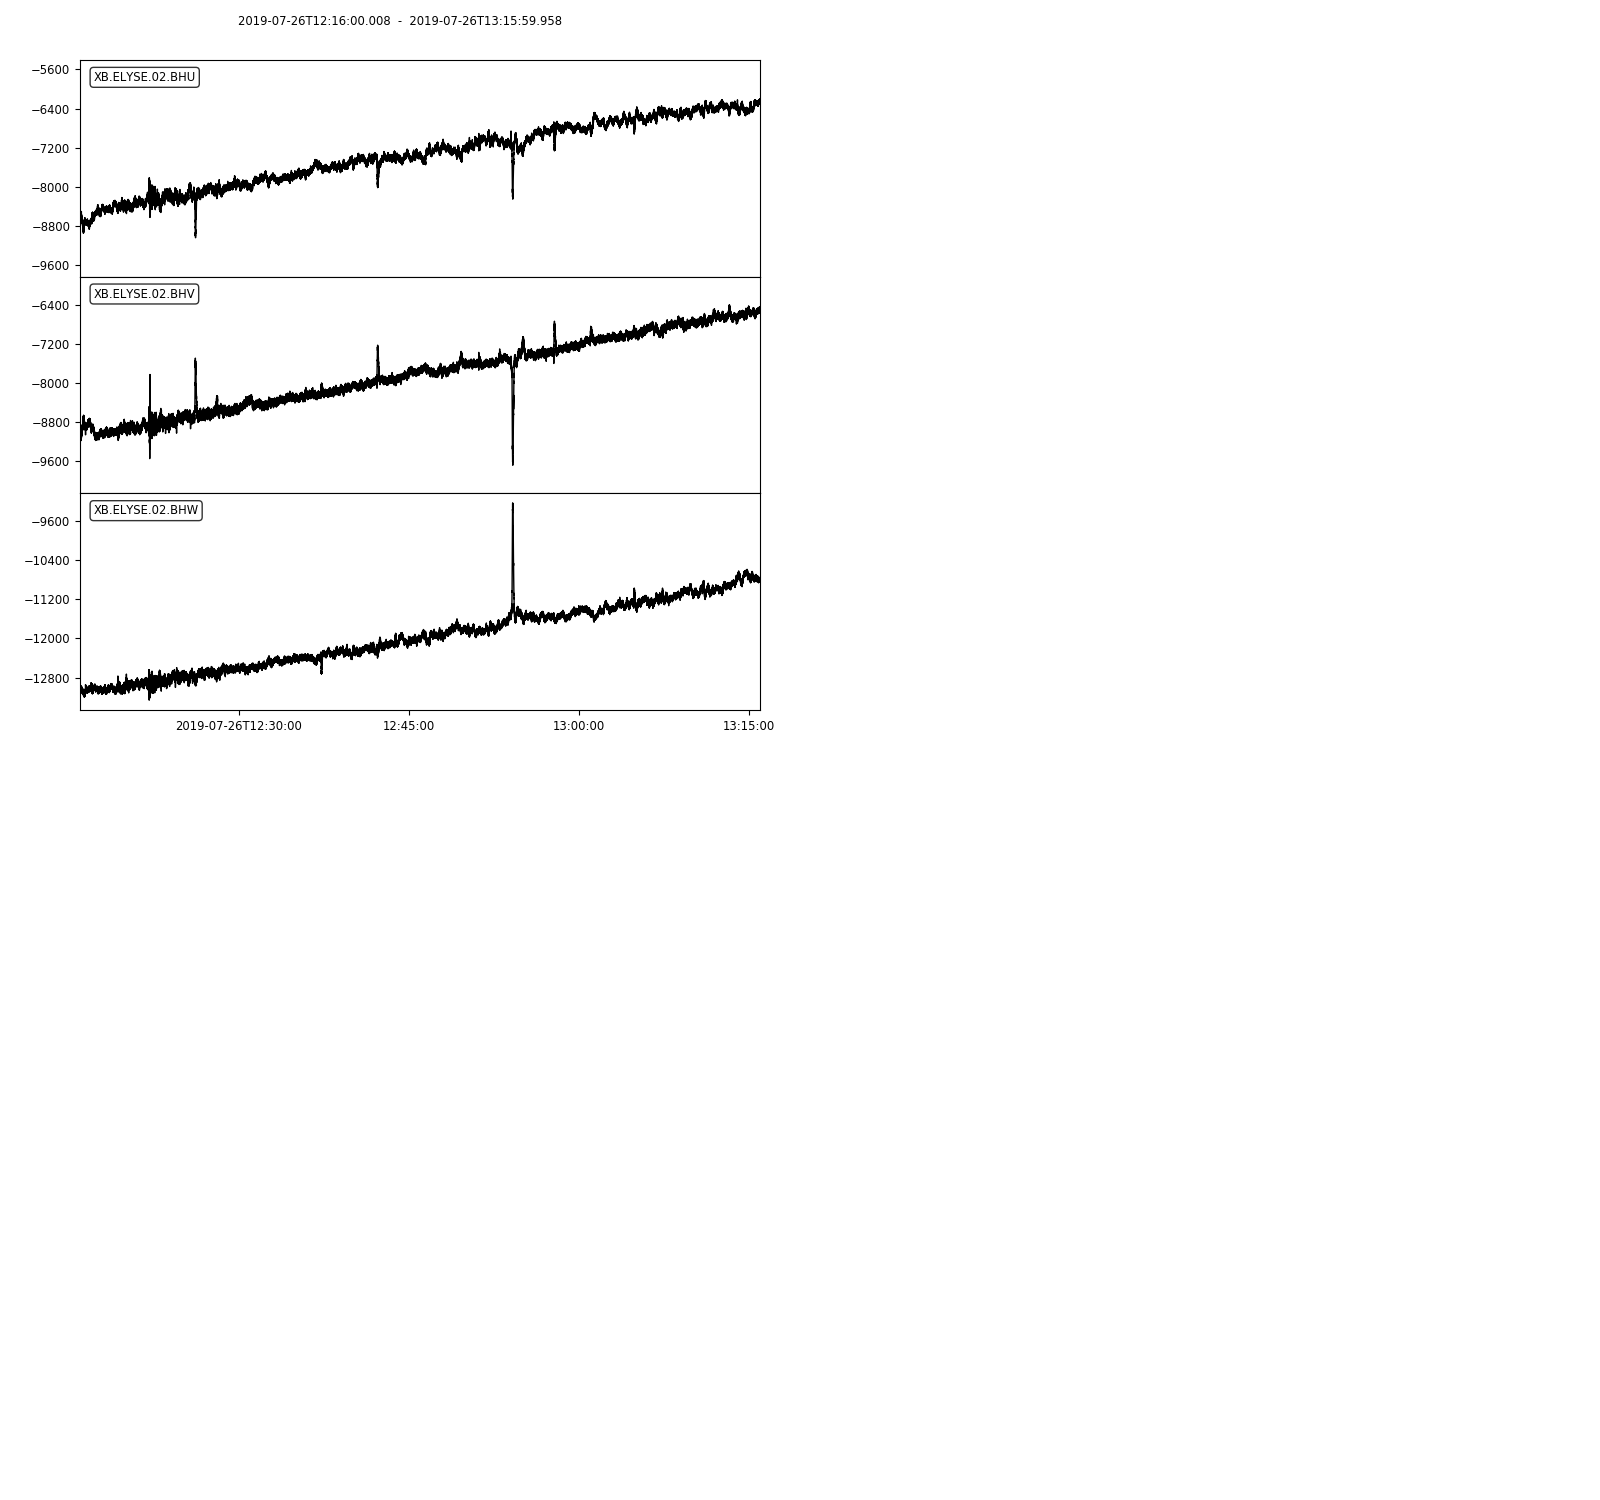

<IPython.core.display.Javascript object>


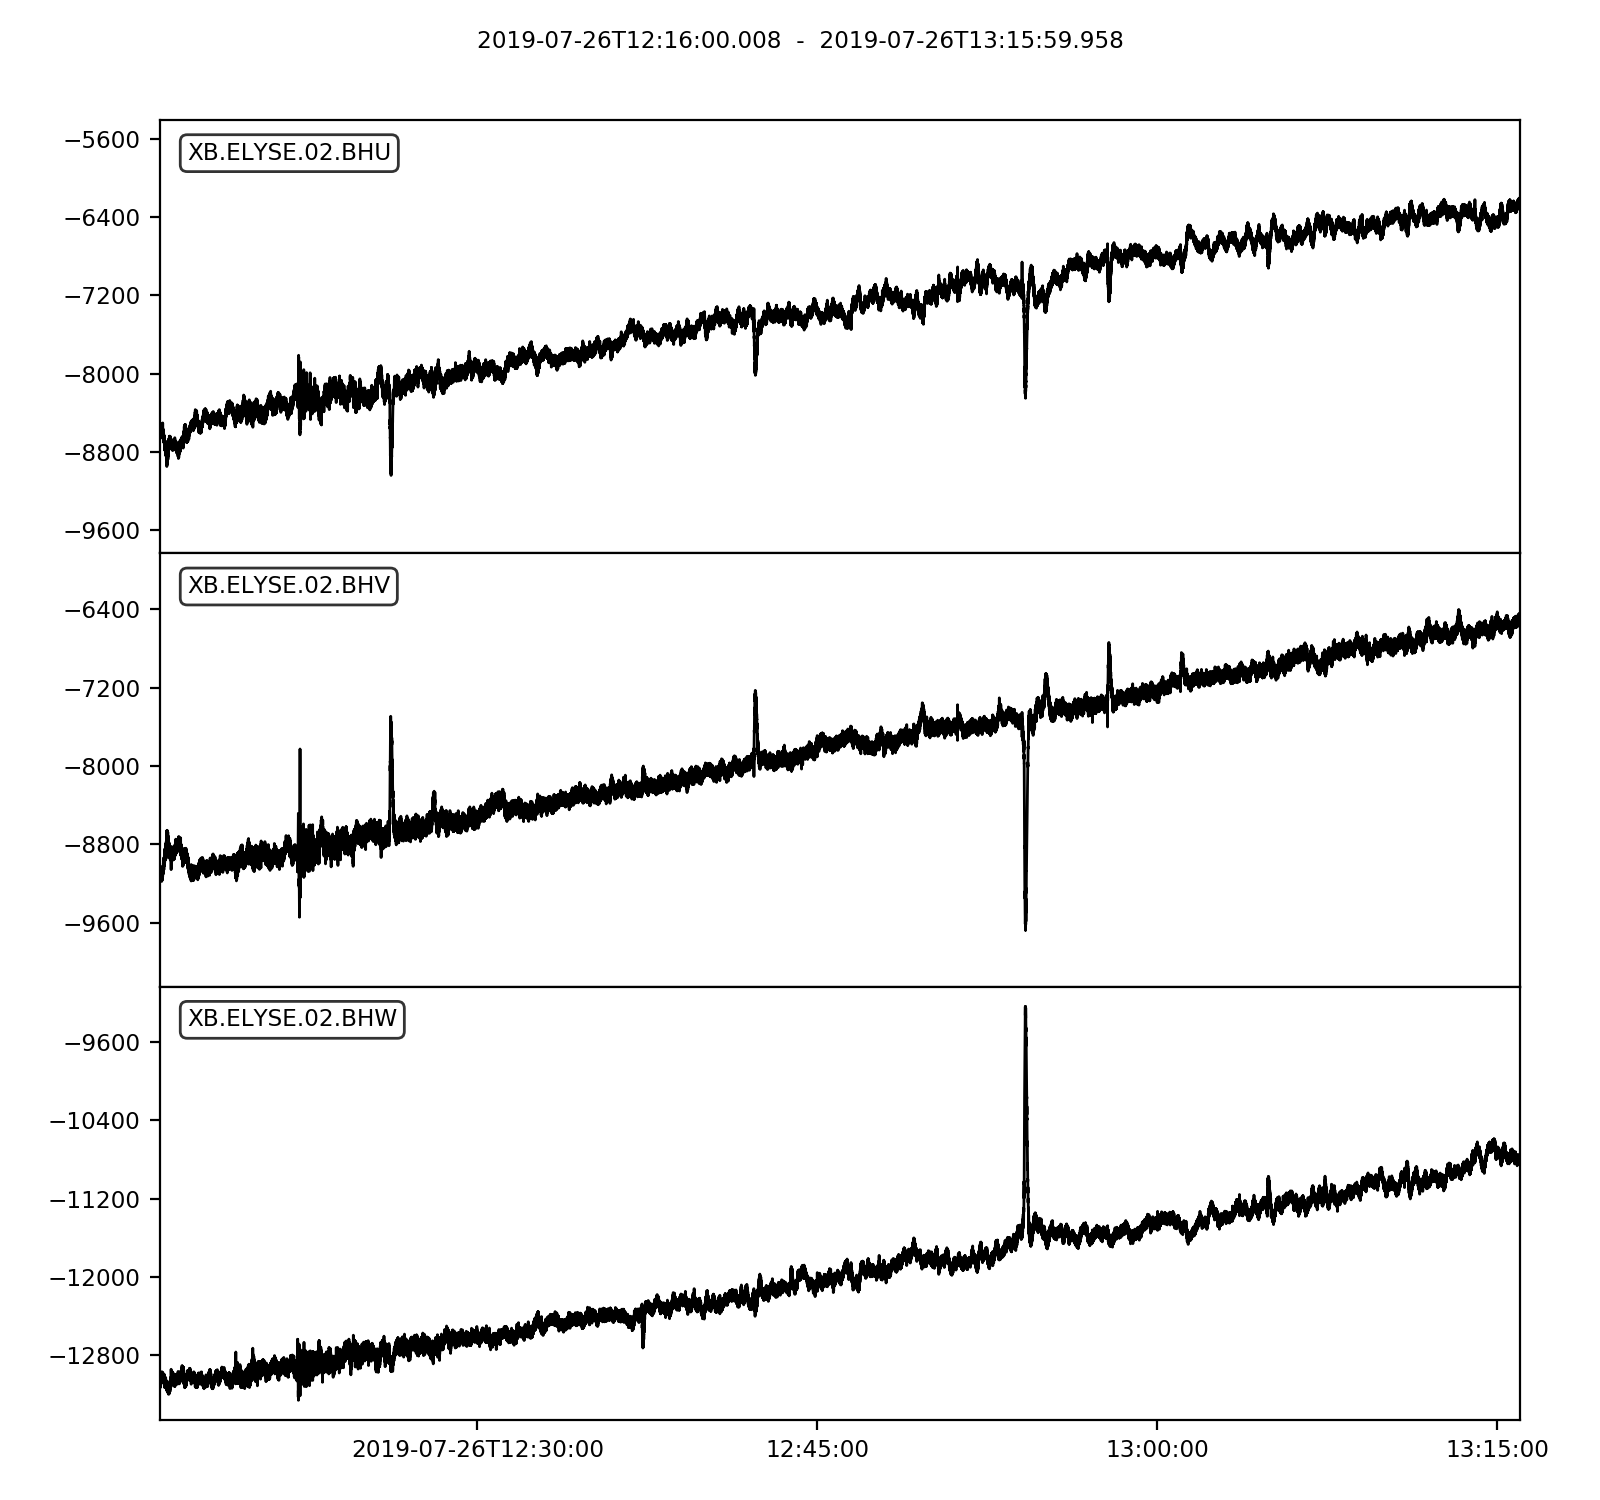

In [42]:
t = UTCDateTime("2019-07-26T12:16:00")
st = client.get_waveforms("XB", "ELYSE", "02", "*", t, t + 60*60)
st.plot()

<IPython.core.display.Javascript object>


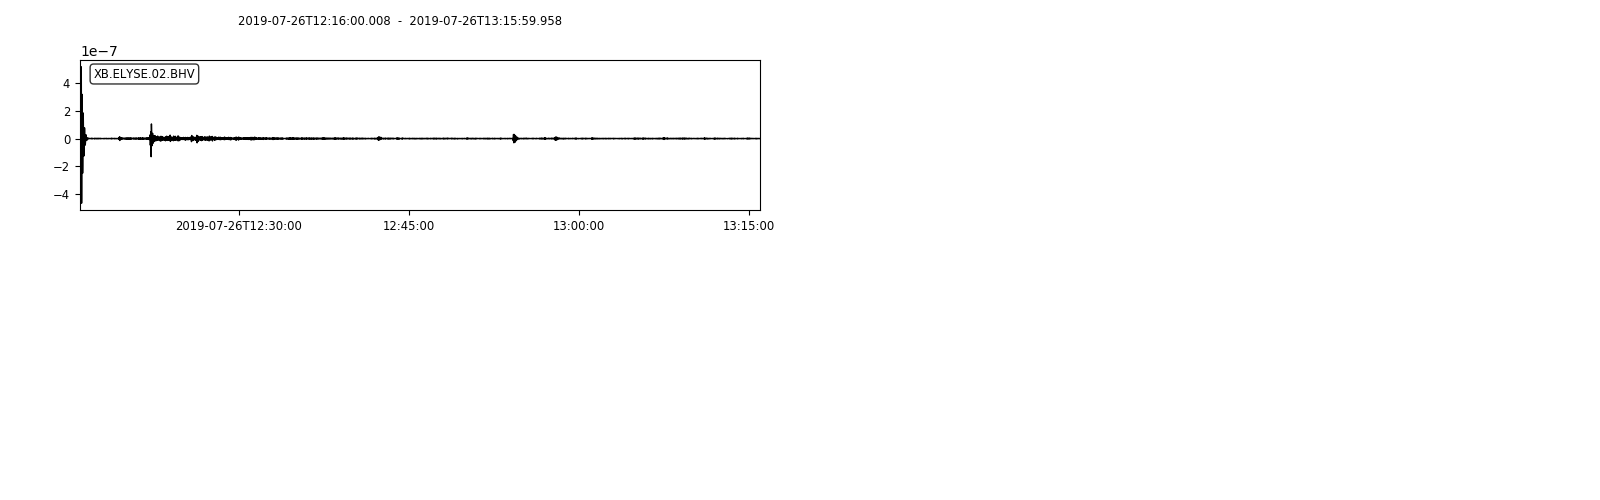

<IPython.core.display.Javascript object>


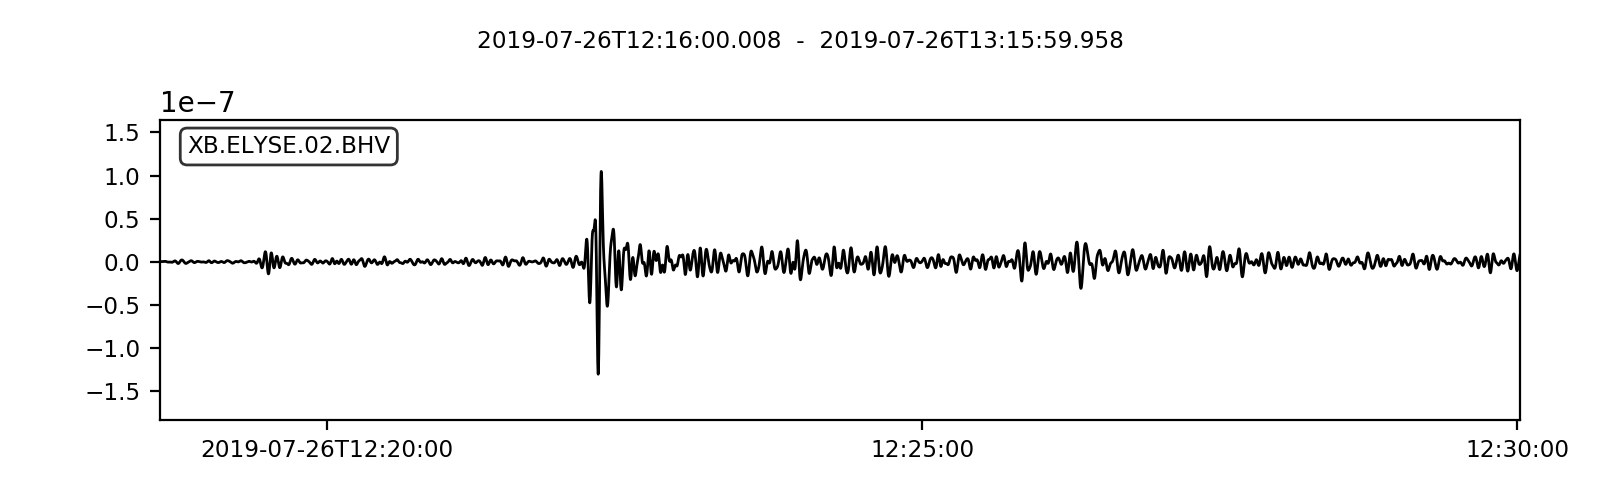

In [46]:
st_filtered = st.filter("highpass", freq = 0.5)
st_final = st_filtered.filter("lowpass", freq = 0.125)
st_final[1].plot()

<IPython.core.display.Javascript object>


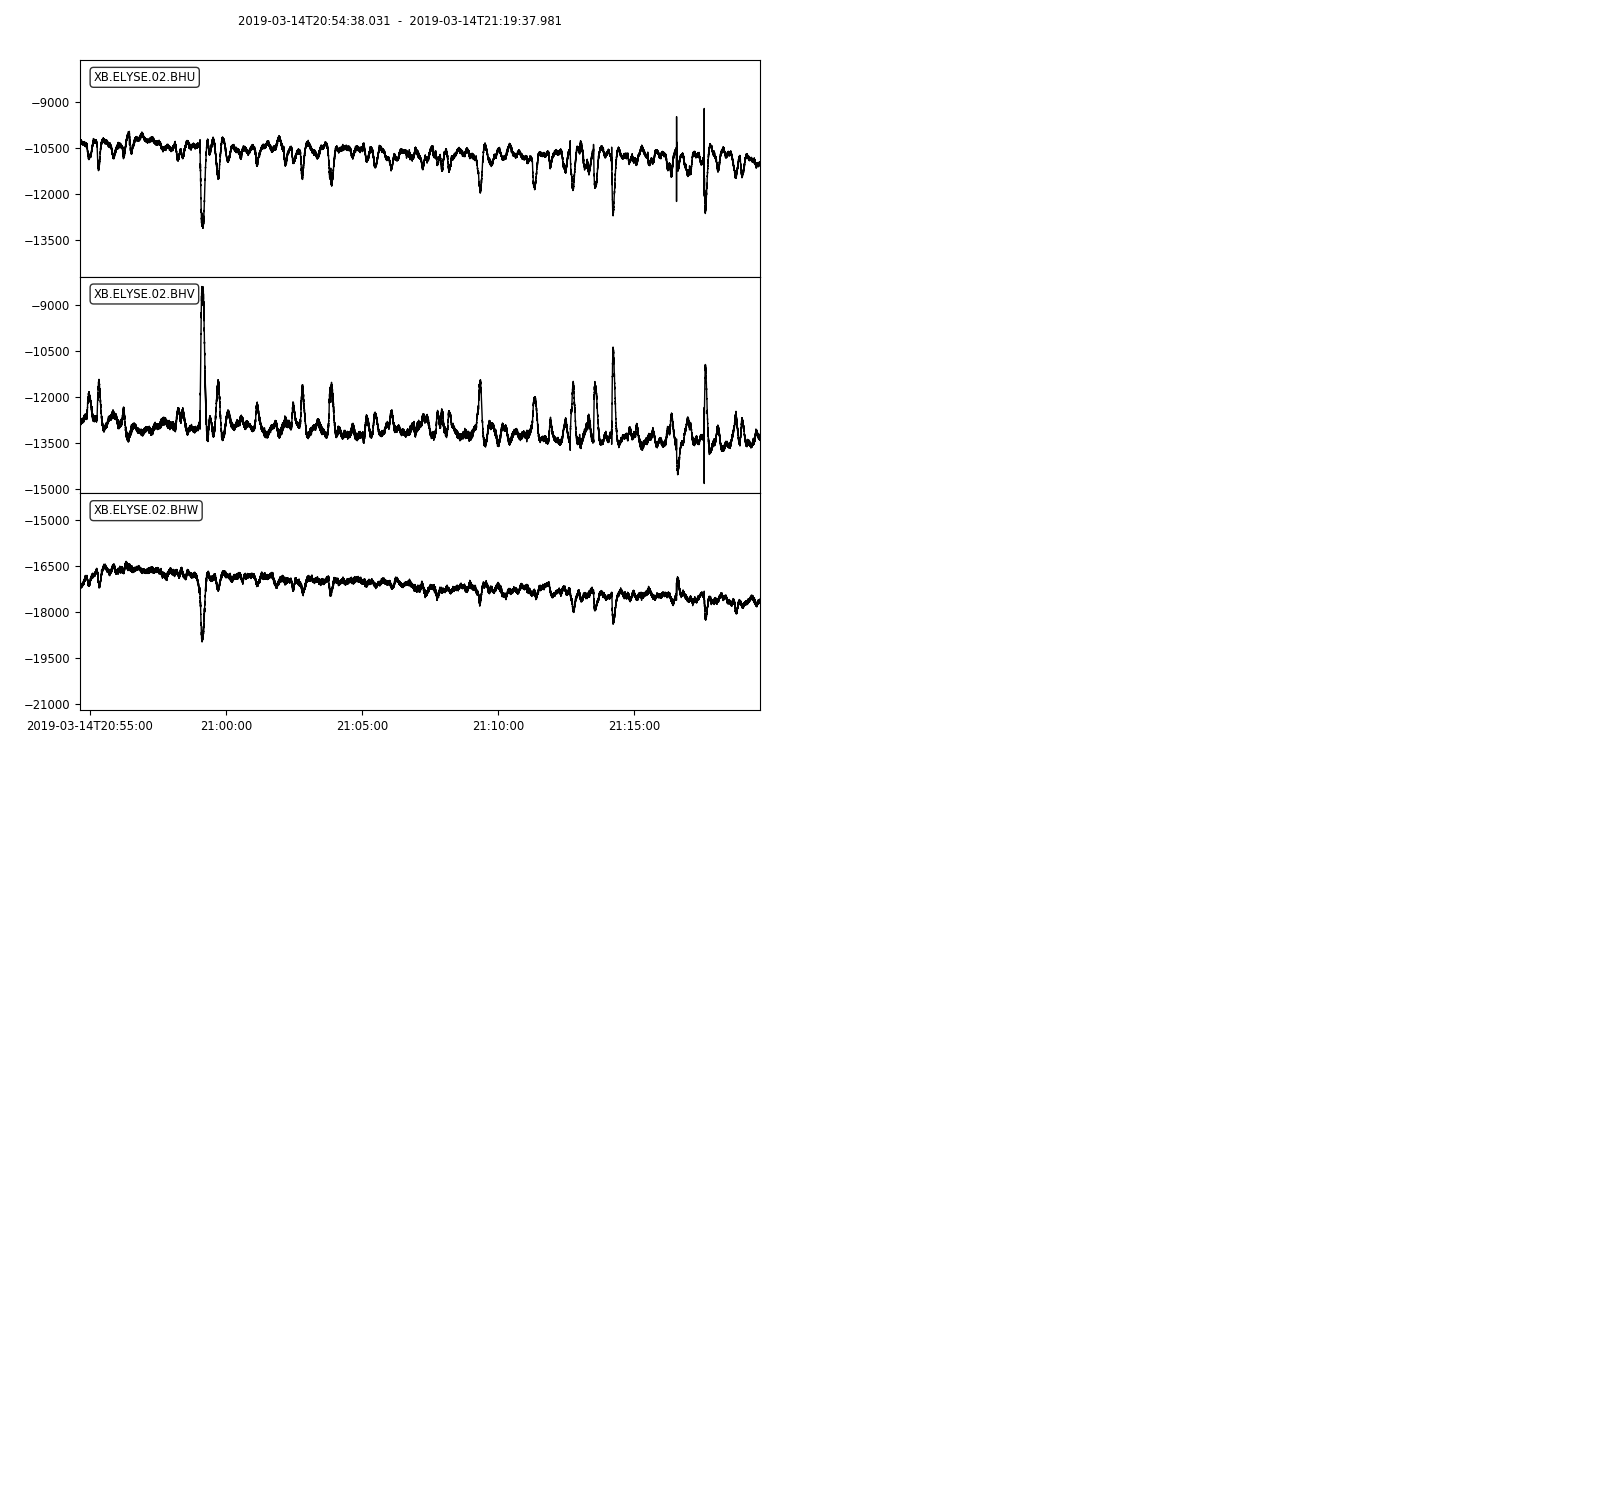

<IPython.core.display.Javascript object>


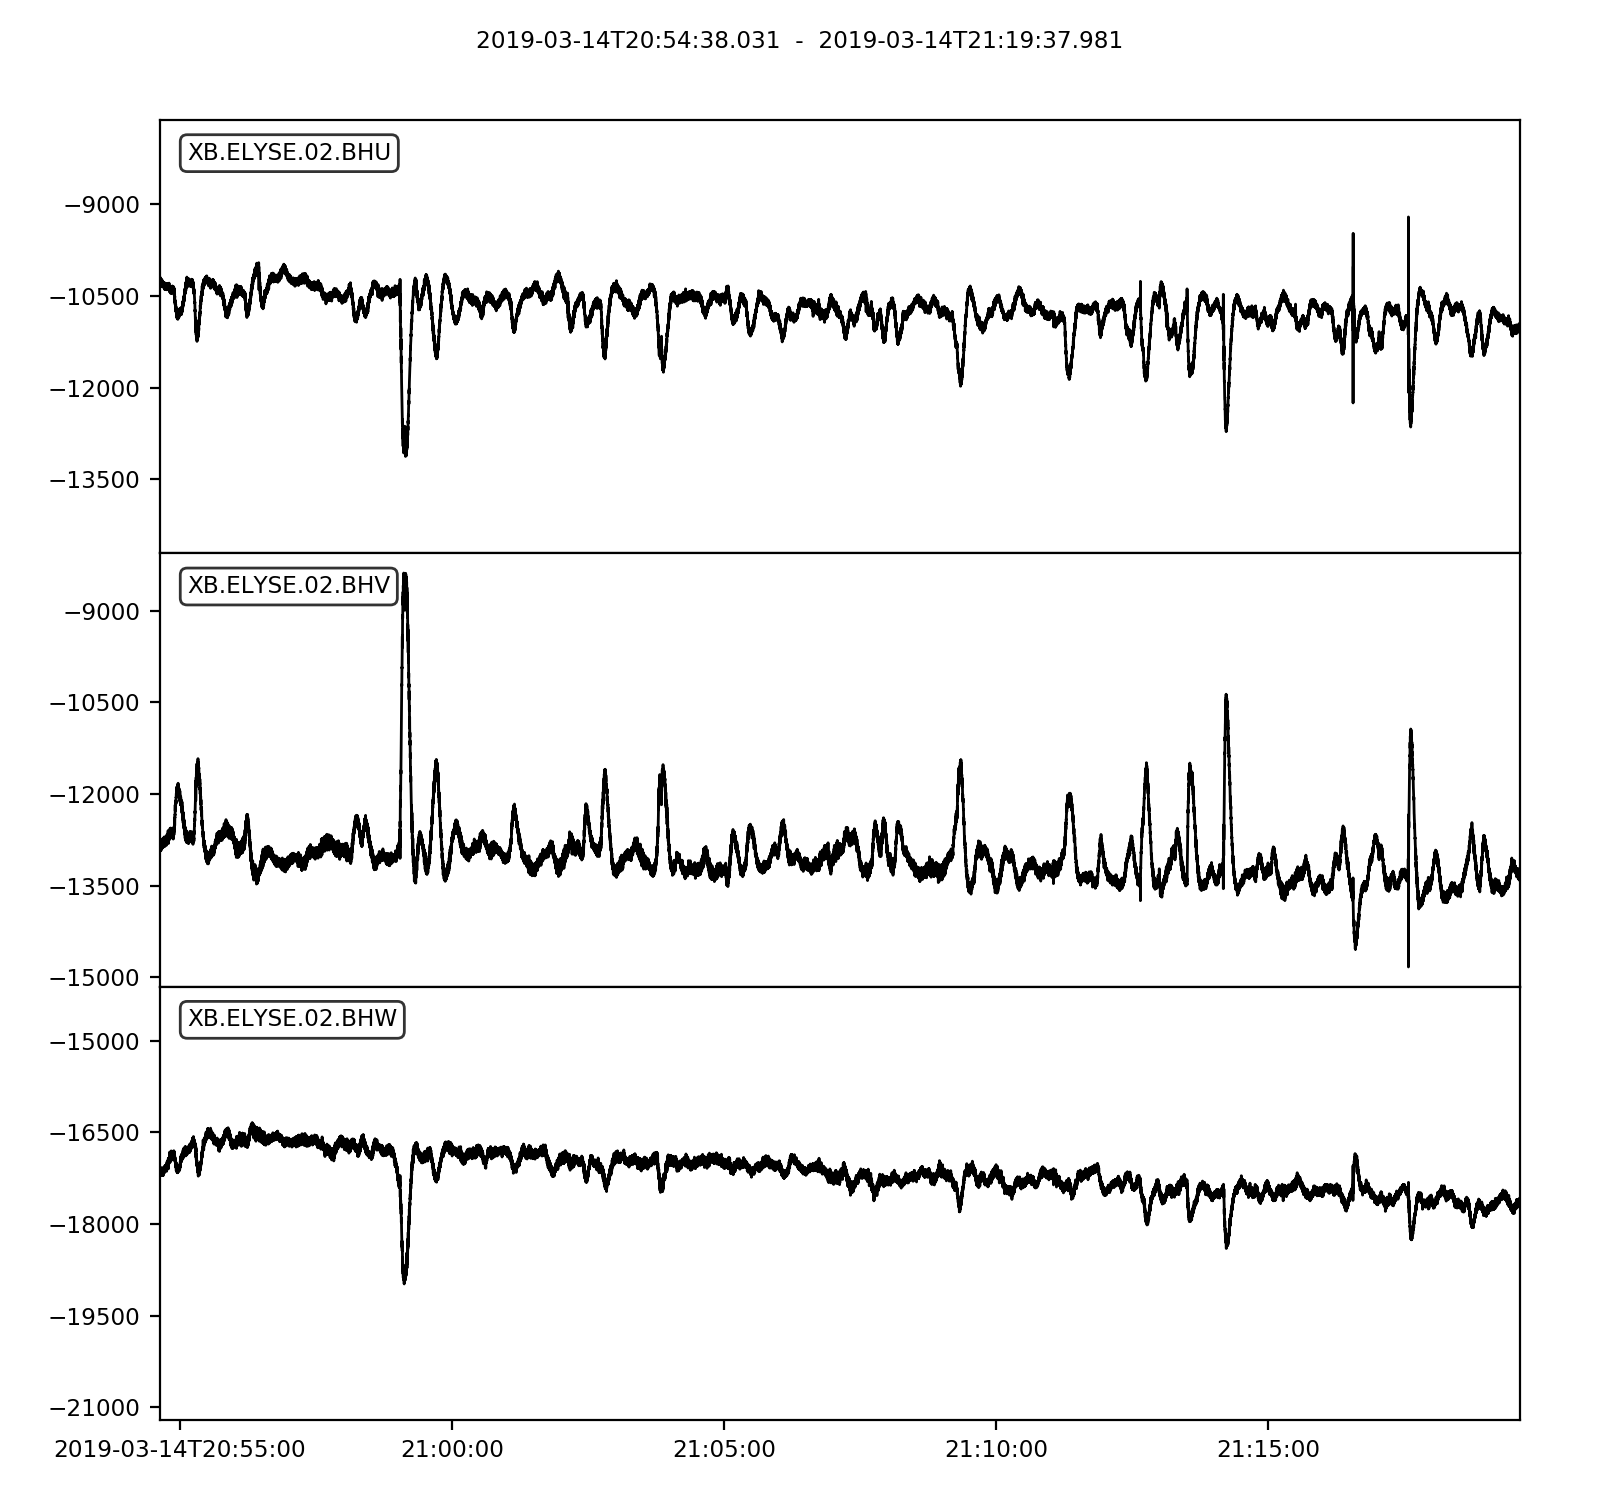

In [82]:
#S0105 has 6 traces (includes a MHU, MHV, MHW) -> long period seismometer
t2 = UTCDateTime("2019-03-14T20:59:38")
st2 = client.get_waveforms("XB", "ELYSE", "02", "B*", t2 - 60*5, t2 + 60*20)
st2.plot()

<IPython.core.display.Javascript object>


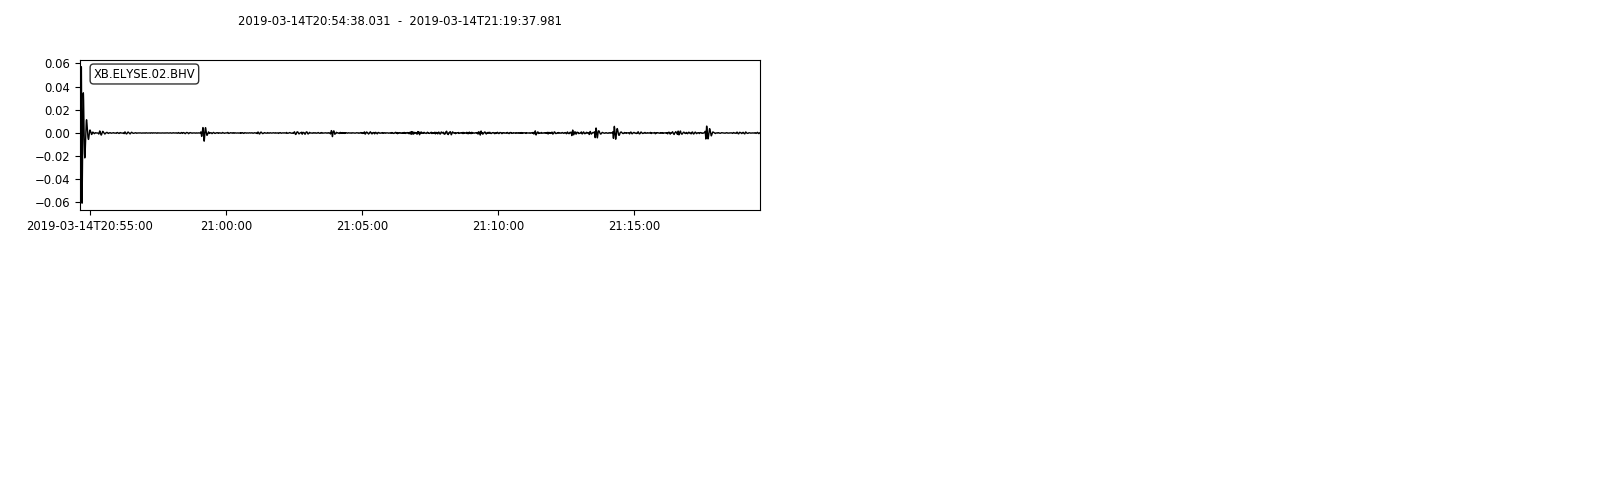

<IPython.core.display.Javascript object>


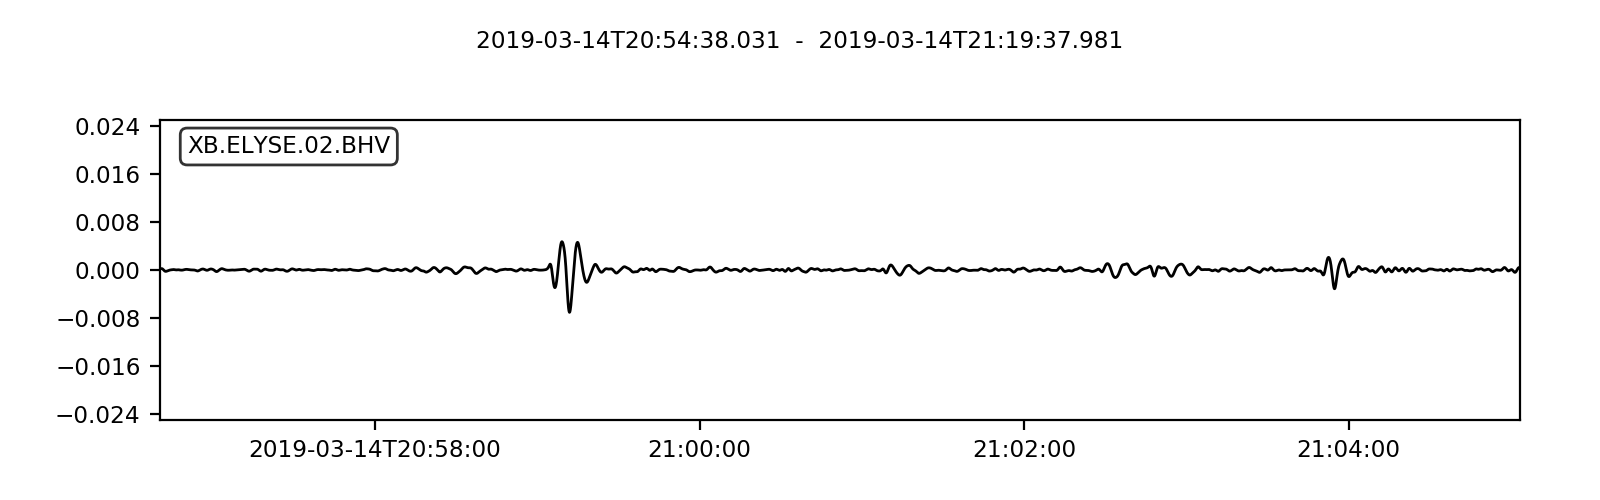

In [66]:
st2_filtered = st2.filter("highpass", freq = 0.5)
st2_final = st2_filtered.filter("lowpass", freq = 0.125)
st2_final[1].plot()

# Trial Waveform Function

<IPython.core.display.Javascript object>


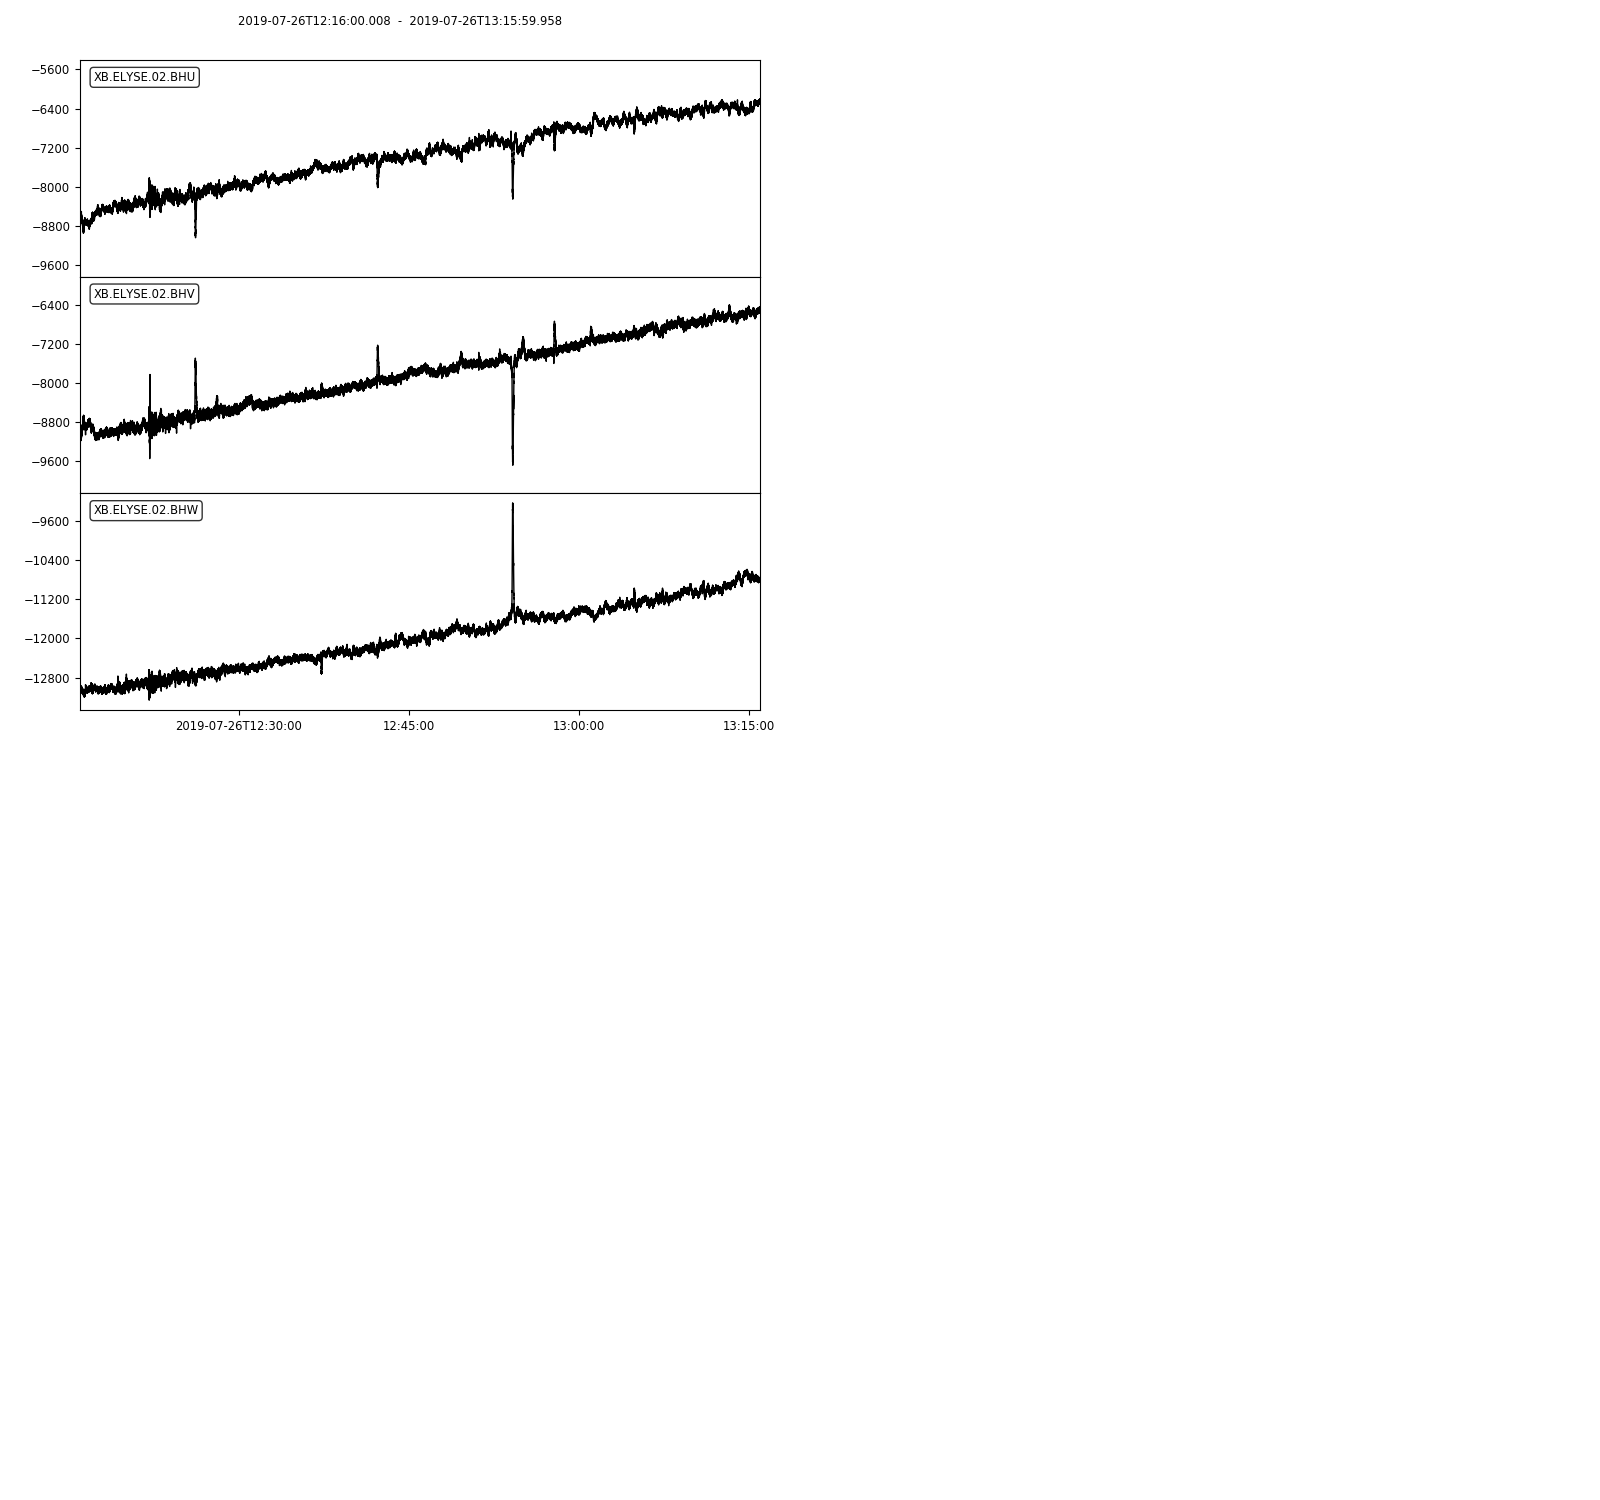

<IPython.core.display.Javascript object>


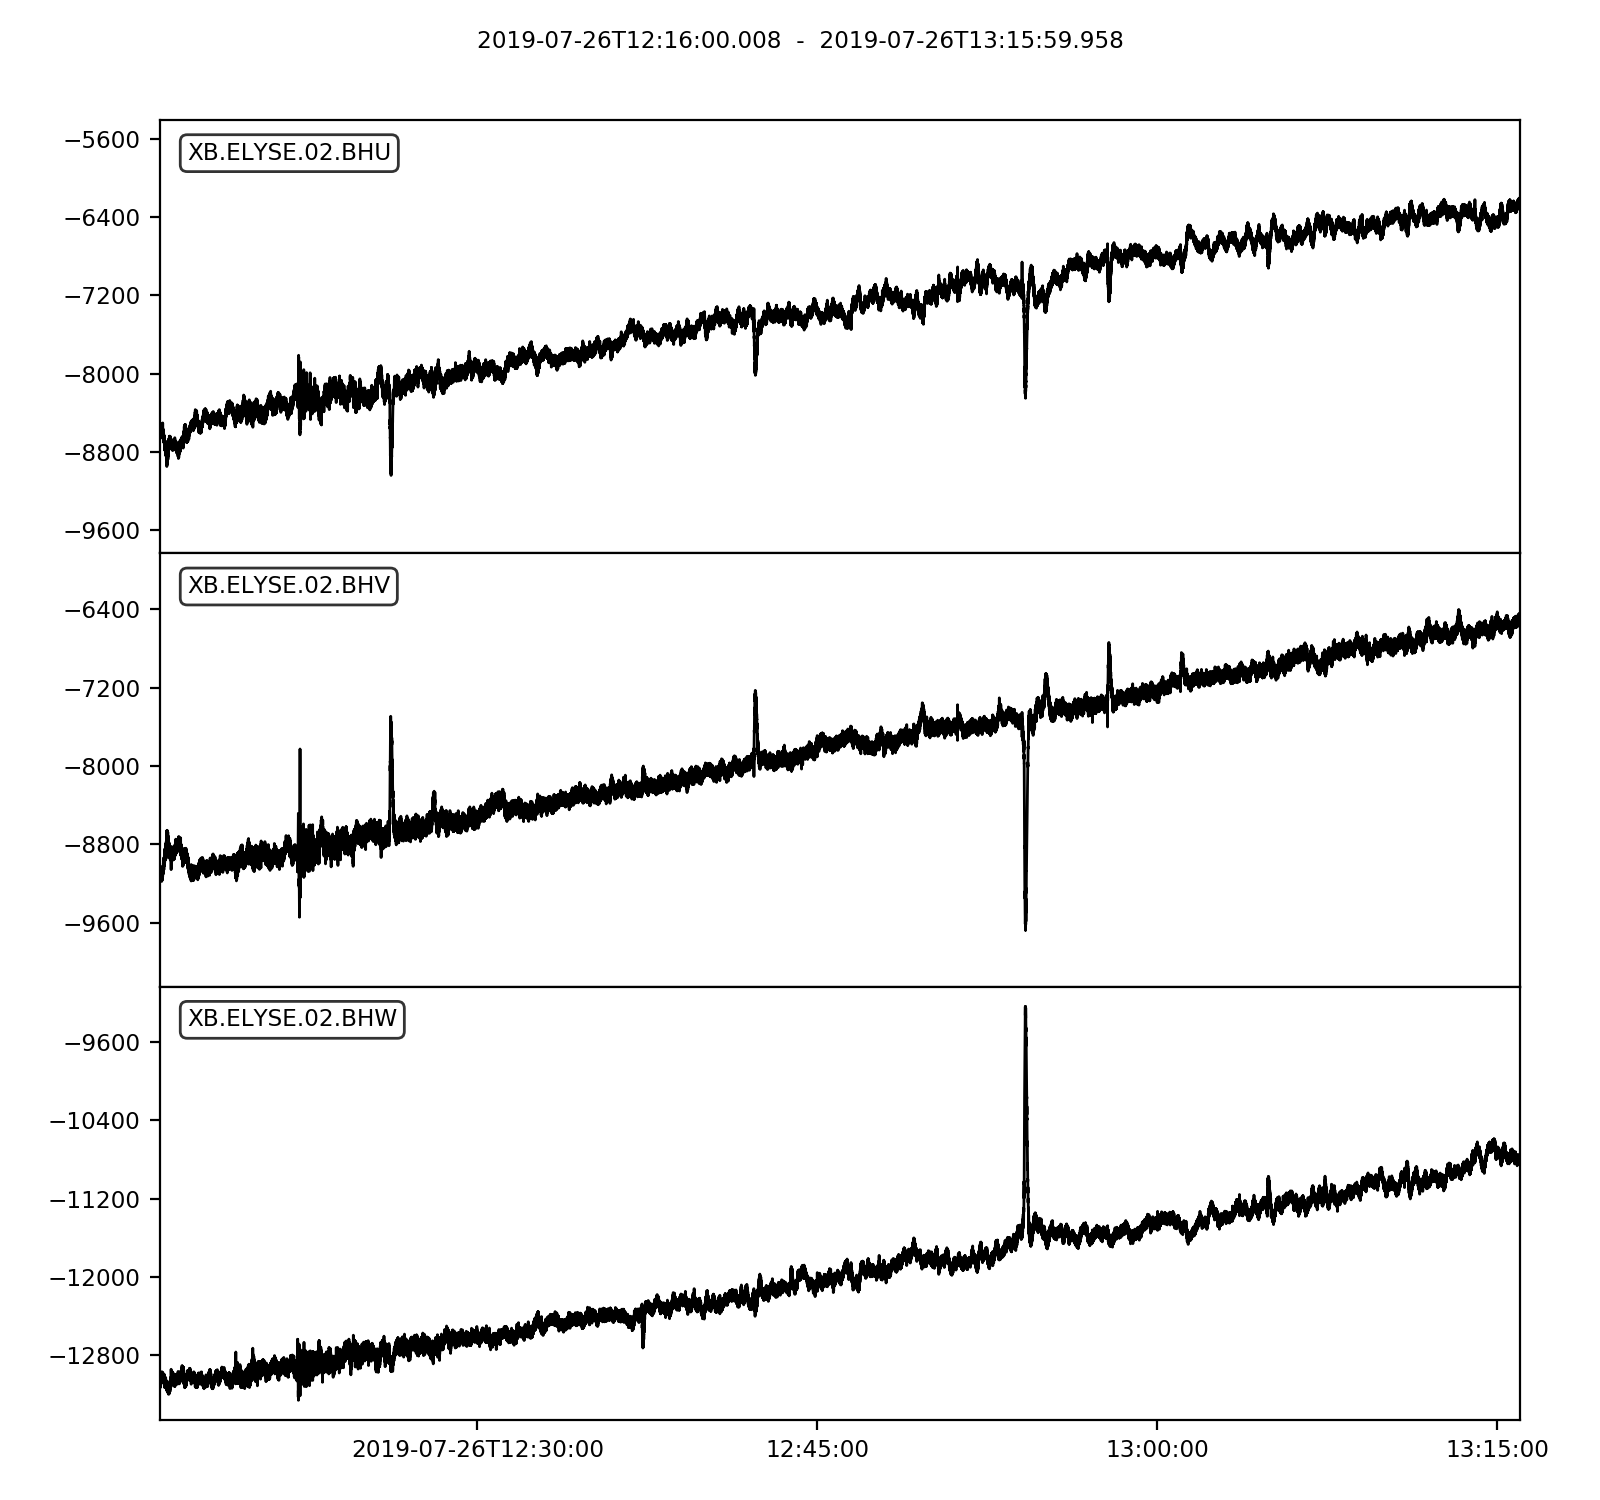

In [74]:
#t = UTCDateTime("2019-07-26T12:16:00")
#st = client.get_waveforms("XB", "ELYSE", "02", "*", t, t + 60*60)

def waveforms(starttime, adj_endtime):
    start_t = UTCDateTime(starttime)
    end_t = start_t + adj_endtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st


S0235b_st = waveforms("2019-07-26T12:16:00", 3600)
S0235b_st.plot()

<IPython.core.display.Javascript object>


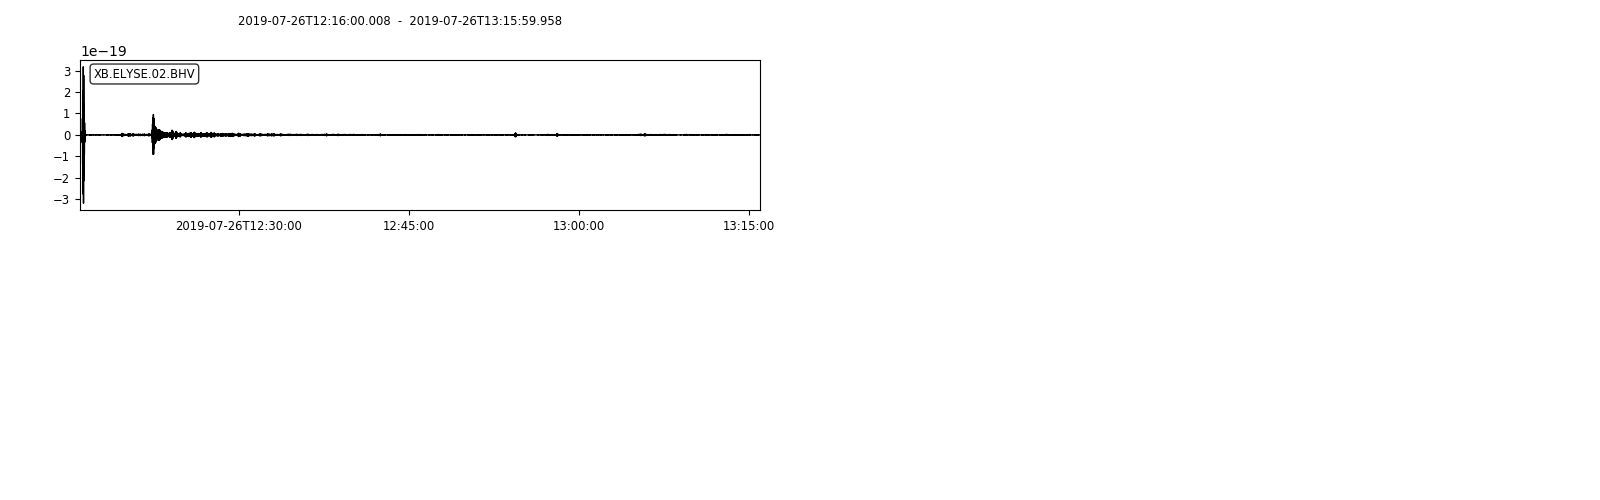

<IPython.core.display.Javascript object>


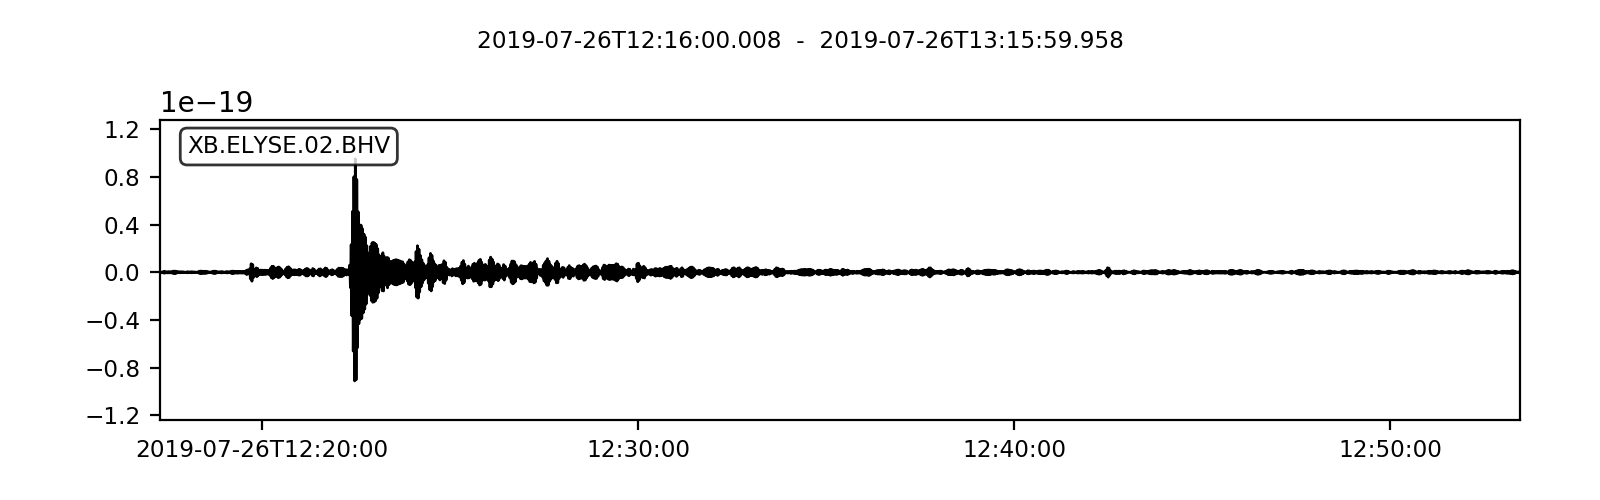

In [89]:
S0235b.filter('bandpass', freqmin=0.125, freqmax=0.5)
S0235b[1].plot()

<IPython.core.display.Javascript object>


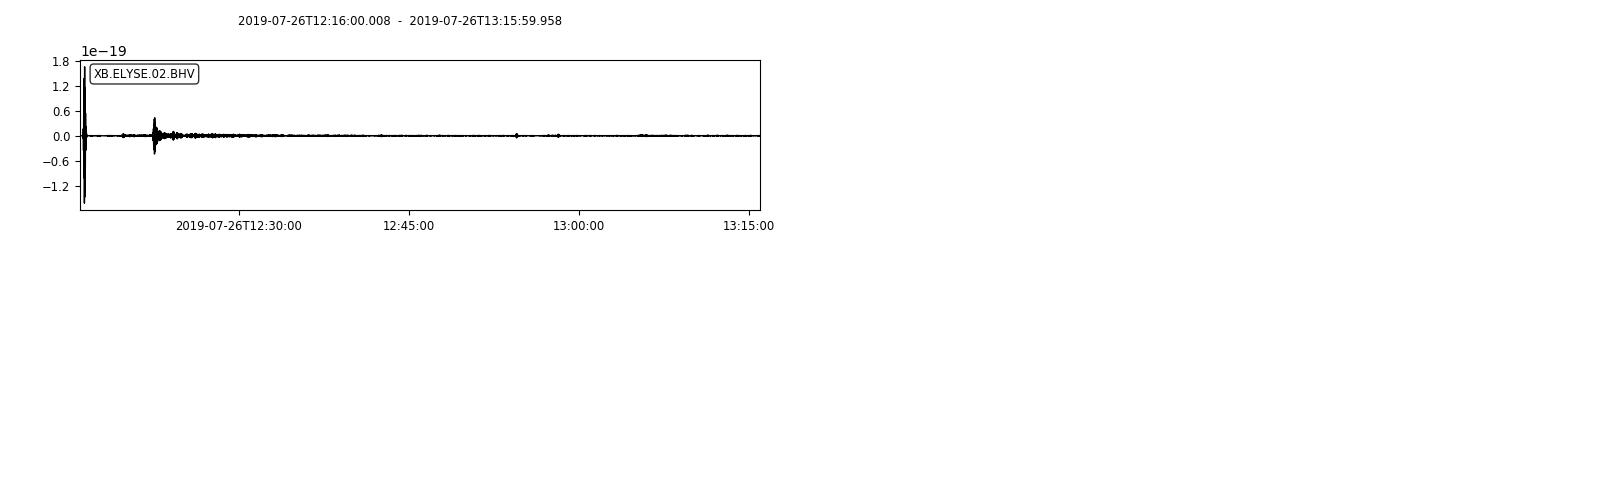

<IPython.core.display.Javascript object>


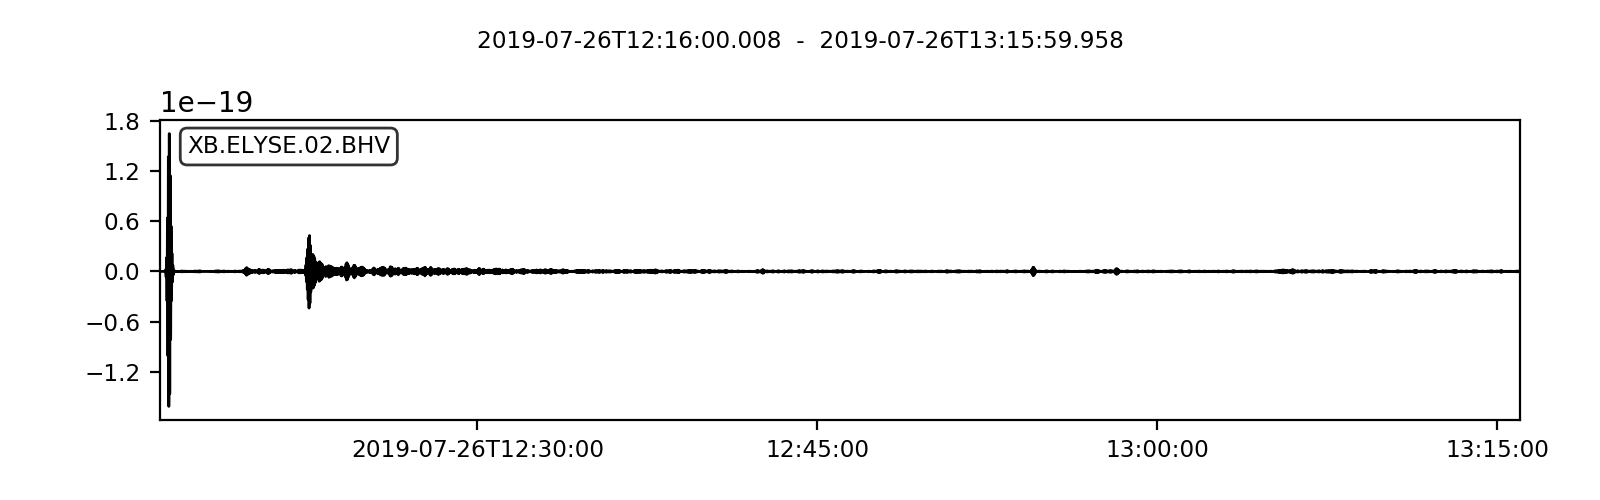

In [122]:
S0235b.detrend(type='linear')
S0235b.filter('lowpass', freq=0.5)
S0235b[1].plot()

***
***
***
# Attempting to Overplot / Plot with pyplot

In [134]:
def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text

<IPython.core.display.Javascript object>


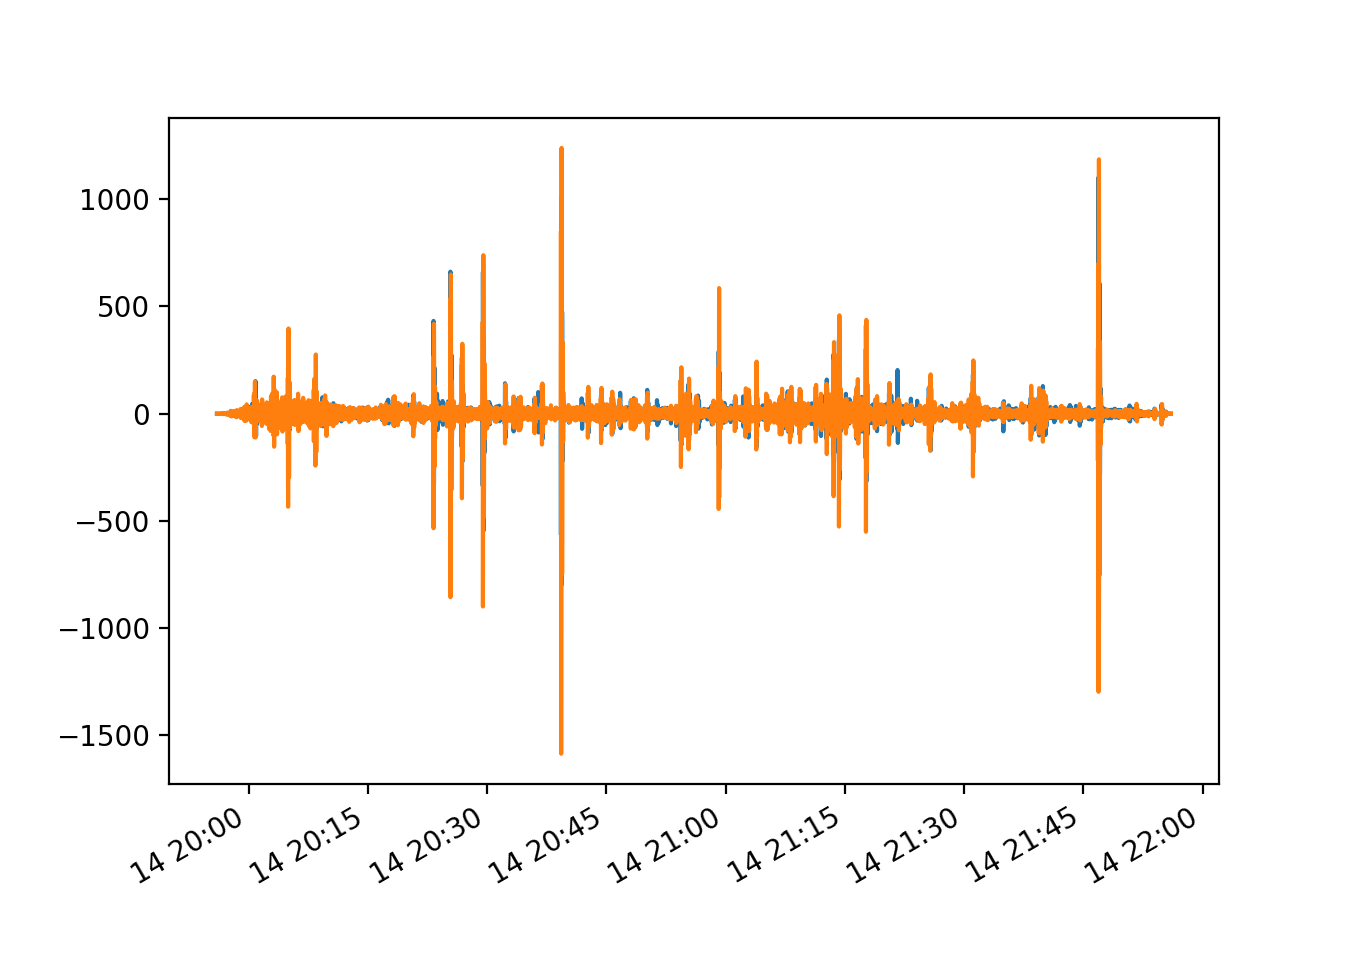

In [131]:
import matplotlib.pyplot as plt

S0105a_st = waveforms("2019-03-14T19:56:00", 2*60*60)
tr = S0105a_st[0]
#t = np.linspace(0, 7200, len(S0105a_st[0]))
t = tr.times("matplotlib")

S0105a_st.detrend('linear')
S0105a_st.taper(max_percentage=0.05, type='cosine')
S0105a_st.filter('bandpass', freqmin=0.125, freqmax=0.5)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, S0105a_st[0])
ax.plot(t, S0105a_st[1])
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

105a
2019-03-14


<IPython.core.display.Javascript object>


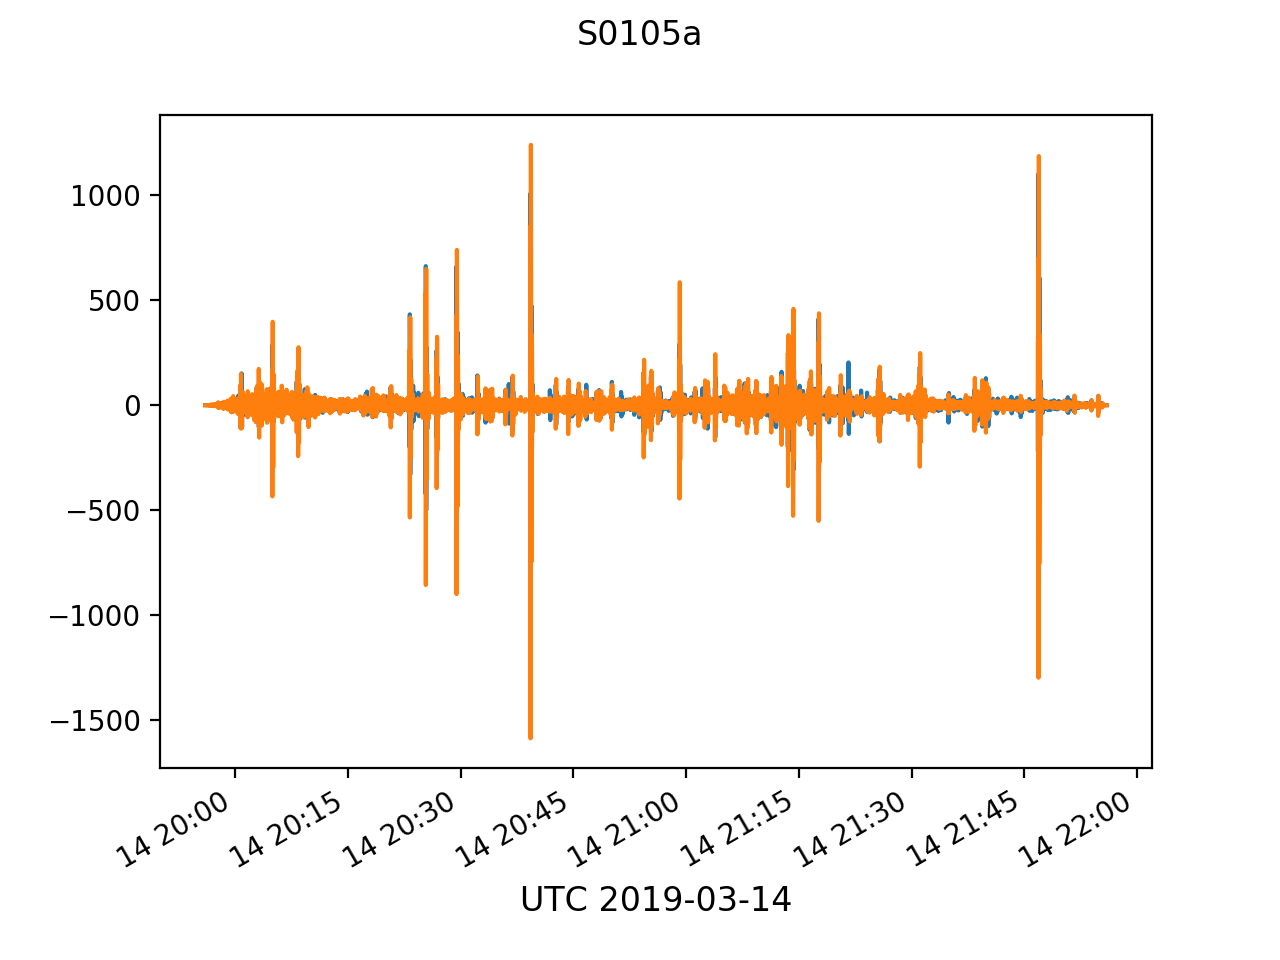

In [190]:
st_105a = waveforms("2019-03-14T19:56:00", 2*60*60)
date = "2019-03-14T19:56:00"
d = date[0:10]
event = '105a'
print(event)
print(d)

f_105a = waveform_filter(st_105a, 'lf')


#need to make a funciton that does the following (include a paramenter called event for titling purposes)
tr = st_105a[0]
t = tr.times('matplotlib')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, f_105a[0])
ax.plot(t, f_105a[1])
ax.xaxis_date()
fig.autofmt_xdate()

ax.set_xlabel("UTC " + d, size=12)
fig.suptitle("S0" + event)

plt.show()

# Waveform Plotter Function

<IPython.core.display.Javascript object>


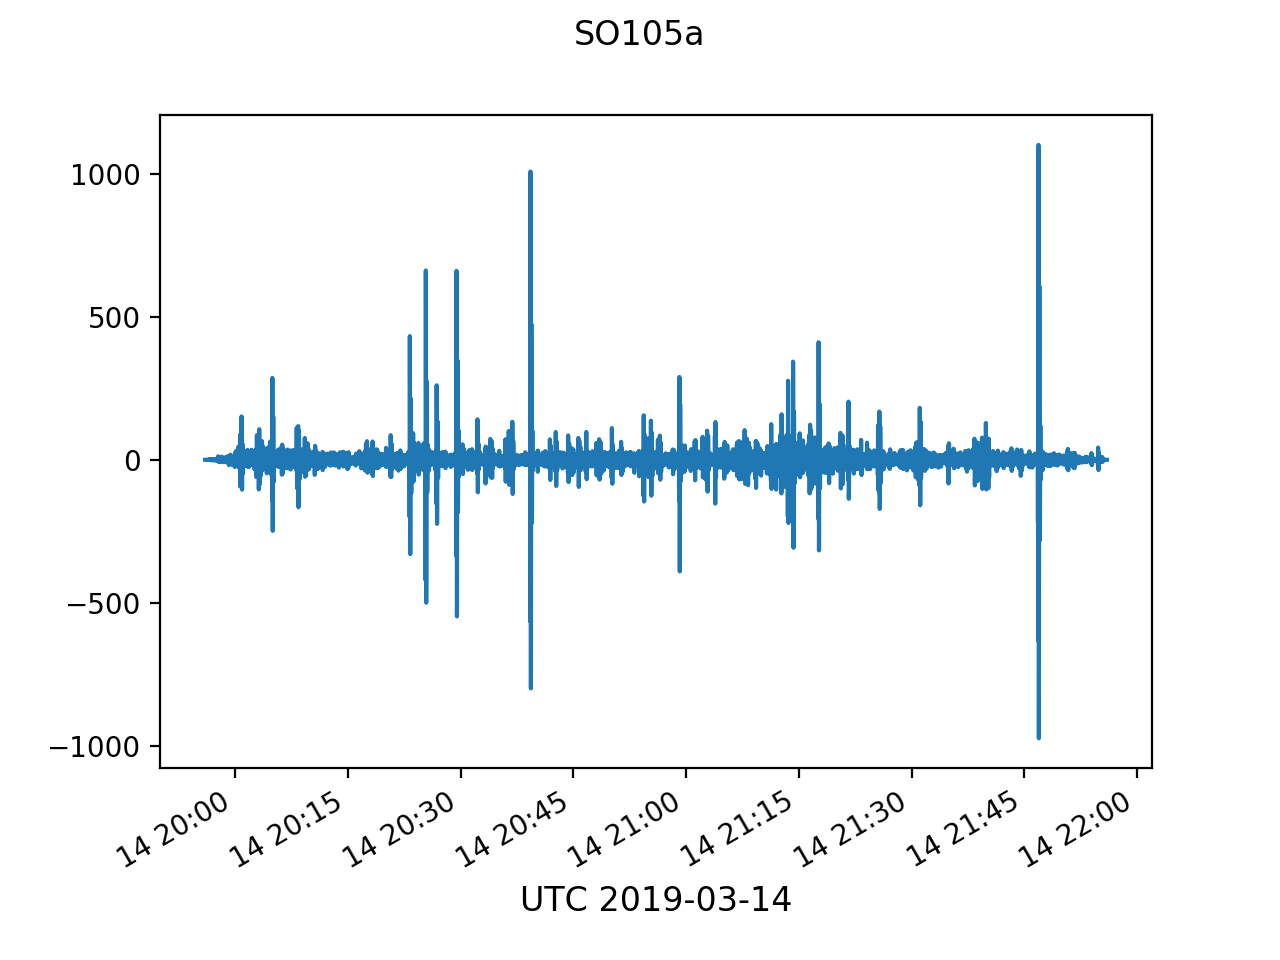

In [178]:
def waveform_plotter1(date, stream, filtered, channel, event):
    d = date[0:10]
    tr = stream[0]
    t = tr.times('matplotlib')
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(t, filtered[channel])
    ax.xaxis_date()
    fig.autofmt_xdate()
    
    ax.set_xlabel("UTC " + d, size=12)
    fig.suptitle("SO" + event)
    plt.show()
    
waveform_plotter("2019-03-14T19:56:00", st_105a, f_105a, 0, "105a")

## Waveform Plotter Function that allows for adjusting after function

In [179]:
def waveform_plotter(date, stream, filtered, event, channels = [0]):
    d = date[0:10]
    tr = stream[0]
    t = tr.times('matplotlib')
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for channel in channels:
        ax.plot(t, filtered[channel])   #allows for overplot of multiple channels w/ default channel = 0
    
    ax.xaxis_date()
    fig.autofmt_xdate()
    
    ax.set_xlabel("UTC " + d, size=12)
    fig.suptitle("SO" + event)
    return fig, ax          # will return these variables which will allow the plot to be edited after the func is run
                            # therefore the plt.show() func must be run outside of the func

<IPython.core.display.Javascript object>


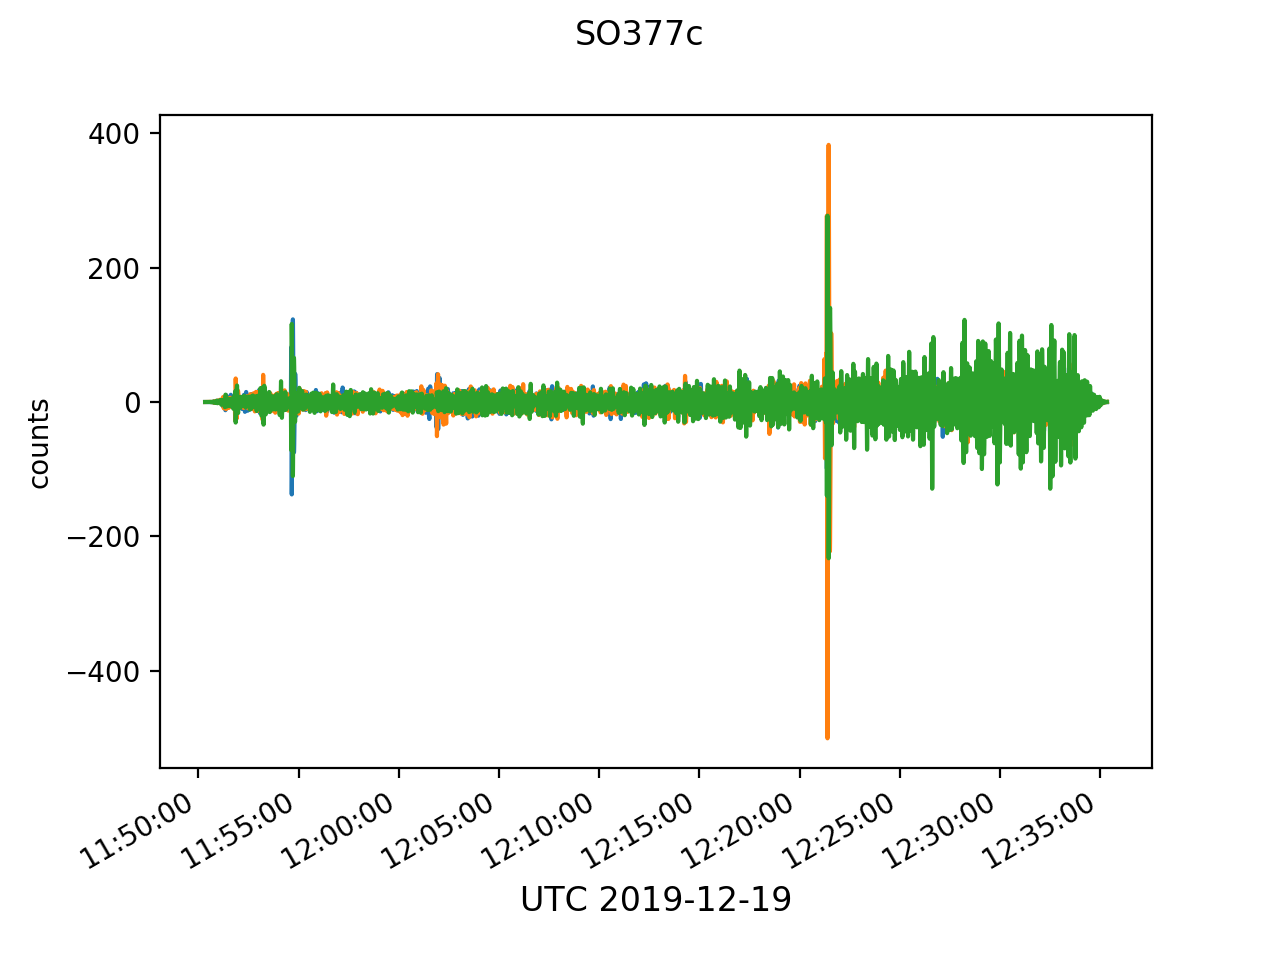

In [208]:
from matplotlib.dates import DateFormatter

t_377c = "2019-12-19T11:50:20"
st_377c = waveforms(t_377c, 2700)
f_377c = waveform_filter(st_377c, 'lf')
fig, ax = waveform_plotter(t_377c, st_377c, f_377c, '377c', channels= [0,1,2])
ax.set_ylabel('counts')

ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

plt.show()

In [196]:
for tr in st_377c:
    print(tr.id)

XB.ELYSE.02.BHU
XB.ELYSE.02.BHV
XB.ELYSE.02.BHW


# Attempting to create Vert/Horiz Components

In [234]:
import math

def waveform_plotter1(date, stream, filtered, event, channels = [0]):
    d = date[0:10]
    tr = stream[0]
    t = tr.times('matplotlib')
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for channel in channels:
        ax.plot(t, filtered[channel])
    
    ax.xaxis_date()
    fig.autofmt_xdate()
    
    ax.set_xlabel("UTC " + d, size=12)
    fig.suptitle("SO" + event)
    return fig, ax

t_377c = "2019-12-19T11:50:20"
tr = st_377c[0]
t = tr.times('matplotlib')
print(len(t))
print(type(t))

54000
<class 'numpy.ndarray'>


In [219]:
#using trace.data makes sure it is just the numbers in the array w/ none of the metadata or stats
print(len(st_377c[0]))
U = math.sqrt(3) * st_377c[0].data
print(len(U))

54000
54000


54000
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


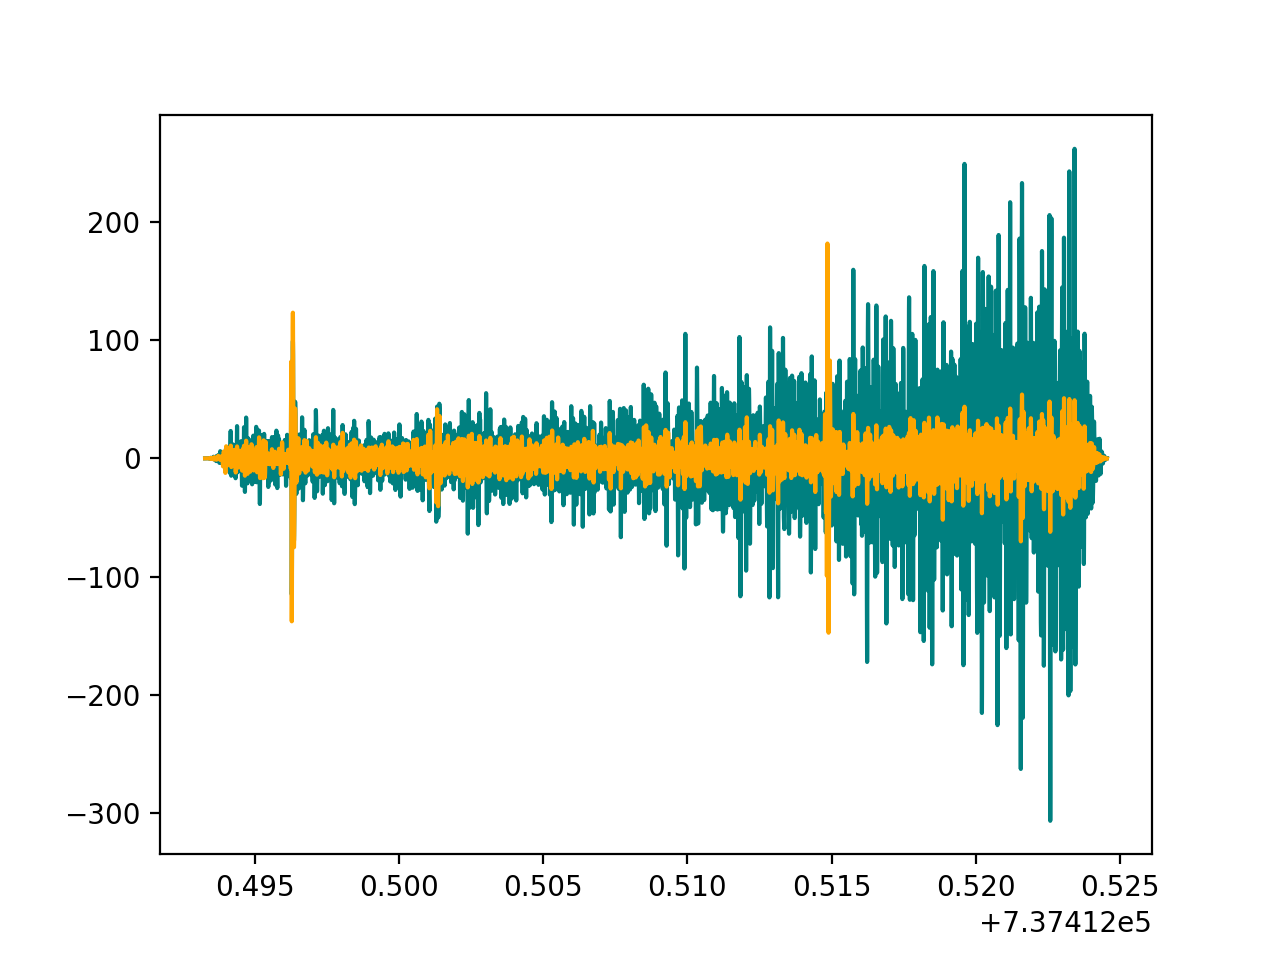

In [242]:
h1 = U + st_377c[1].data + st_377c[2].data
print(len(h1))
print(type(h1))

fig, ax = plt.subplots()
ax.plot(t,h1, color='teal')
ax.plot(t, f_377c[0], color='orange')